# Skills Development Lab - EA 2 [Movie recommendation system]

Dataset used - The Movie DataBase (TMDB)
*[https://www.kaggle.com/tmdb/tmdb-movie-metadata]*

## Group Members

 - Adith Sanjeeve(PRN:17070122058)
 - Akhil Singh (PRN:17070122065)
 - Urvi Rawat (PRN:17070122070)
 - Vaibhav Jaiswal (PRN:17070122071)

## Problem Statement
1. Take a real-life case and understand the problem statement and its domain aspects 
2. Then perform the data preparation, data source identification, and data cleansing step 
3. Select an algorithm for the recommender system. 
4. Look into the design and development aspects while building the model 
5. Finally, evaluate and test the recommender system 

## Algorithm/Steps taken

We needed to build a kernel that would make as a recommendation driver, so we used the TMDB 5000 Movie Dataset dataset. Due to a DMCA removal request from IMDB, Kaggle has deleted the original IMDB version of this dataset and replaced it with a comparable compilation of movies from The Movie Database (TMDb).

We did the following after some data preparation (the files given contain JSON columns) and extensive data exploration and visualization:

 - First and foremost, we determined a weighted ranking for each film. We used the same formula as IMDB employs for its scores. This calculation considers both the vote average and the number of votes cast (and a few other parameters). 

 - We developed a **Basic Recommendation feature** that recommends 5 movies based on a genre and language selection. Based on this information, the five movies with the highest weighted ranking are recommended.


- We have developed a **Content-based Recommendation feature** that takes a movie as input. The role then recommends 5 films based on the similarities of the top three stars, top three genres, and the director. If two or more films with the same number of similarities, they are sorted by descending weighted scores. 


- We loaded another dataset containing user ratings in this version. This enabled us to create a **Collaborative Filtering based Recommendations**. This does not use the features of the products, but rather the opinions of the users. There are two main types of collaborative recommendation systems:

    - **User-based collaborative system:**
      It is based on finding similar users and find the items those users have liked but we haven’t tried yet.

    - **Item-based collaborative system:** 
      In this case, we will find similar products to the one the user has bought and we will recommend those products that are similar to those which has ratted as best.

# Preparing the data

In this dataset, two csv-files are provided: tmdb_5000_movies.csv and tmdb_5000_credits.csv.

## Installing and Loading the required packages

Run these 2 commands in terminal before moving on to installing packages
- conda install -c anaconda cairo  
- conda install -c anaconda pkgconfig

In [11]:
# Installing the Missing Libraries required to run the notebook
packages <- c("tidyverse", "scales", "jsonlite", "knitr","hms", "kableExtra", "ggrepel","gridExtra","lubridate",
              "tidytext","wordcloud","recommenderlab","wordcloud2","RColorBrewer","plotly","tidyr")
install.packages(setdiff(packages, rownames(installed.packages())))  

In [12]:
update.packages(ask = FALSE)

also installing the dependencies 'rappdirs', 'sass', 'jquerylib', 'gargle', 'ids', 'rematch2', 'pROC', 'blob', 'isoband', 'shape', 'farver', 'fastmap', 'commonmark', 'bslib', 'cachem', 'dtplyr', 'googledrive', 'googlesheets4'




  There are binary versions available but the source versions are later:
           binary  source needs_compilation
shape       1.4.5   1.4.6             FALSE
bslib       0.2.4 0.2.5.1             FALSE
cachem      1.0.4   1.0.5              TRUE
arules      1.6-7   1.6-8              TRUE
caret      6.0-86  6.0-88              TRUE
fansi       0.4.2   0.5.0              TRUE
formatR       1.9    1.10             FALSE
hms         1.0.0   1.1.0             FALSE
pillar      1.6.0   1.6.1             FALSE
recosystem  0.4.4   0.4.5              TRUE
stringi     1.6.1   1.6.2              TRUE
tibble      3.1.1   3.1.2              TRUE
xfun         0.22    0.23              TRUE

  Binaries will be installed
package 'rappdirs' successfully unpacked and MD5 sums checked
package 'sass' successfully unpacked and MD5 sums checked
package 'jquerylib' successfully unpacked and MD5 sums checked
package 'gargle' successfully unpacked and MD5 sums checked
package 'ids' successfully unpacked a

installing the source packages 'shape', 'bslib', 'formatR', 'hms', 'pillar'



In [13]:
#supress warnings
options(warn=-1)

#loading the libraries needed
library(tidyverse)
library(scales)
library(jsonlite)
library(knitr)
library(kableExtra)
library(ggrepel)
library(gridExtra)
library(lubridate)
library(tidytext)
library(wordcloud)
library(wordcloud2)
library(recommenderlab)
library(RColorBrewer)
library(plotly)
library(tidyr)


## Loading the Dataset i.e. movies file
- The movies file contains 20 variables on 4,803 movies.

In [14]:
movies <- read_csv("tmdb_5000_movies.csv", na="NA")
credits <- read_csv("tmdb_5000_credits.csv",  na="NA")

glimpse(movies)

Parsed with column specification:
cols(
  .default = col_character(),
  budget = col_double(),
  id = col_double(),
  popularity = col_double(),
  release_date = col_date(format = ""),
  revenue = col_double(),
  runtime = col_double(),
  vote_average = col_double(),
  vote_count = col_double()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  movie_id = col_double(),
  title = col_character(),
  cast = col_character(),
  crew = col_character()
)


Observations: 4,803
Variables: 20
$ budget               <dbl> 2.37e+08, 3.00e+08, 2.45e+08, 2.50e+08, 2.60e+...
$ genres               <chr> "[{\"id\": 28, \"name\": \"Action\"}, {\"id\":...
$ homepage             <chr> "http://www.avatarmovie.com/", "http://disney....
$ id                   <dbl> 19995, 285, 206647, 49026, 49529, 559, 38757, ...
$ keywords             <chr> "[{\"id\": 1463, \"name\": \"culture clash\"},...
$ original_language    <chr> "en", "en", "en", "en", "en", "en", "en", "en"...
$ original_title       <chr> "Avatar", "Pirates of the Caribbean: At World'...
$ overview             <chr> "In the 22nd century, a paraplegic Marine is d...
$ popularity           <dbl> 150.43758, 139.08262, 107.37679, 112.31295, 43...
$ production_companies <chr> "[{\"name\": \"Ingenious Film Partners\", \"id...
$ production_countries <chr> "[{\"iso_3166_1\": \"US\", \"name\": \"United ...
$ release_date         <date> 2009-12-10, 2007-05-19, 2015-10-26, 2012-07-1...
$ revenue         

There are three instances where two films have the same title. When we look at the release dates, we will see that there are two separate films. This suggests that we must be cautious and use the id as the unique identifier rather than the word.

Five columns (genres, keywords, production companies, production countries, and spoken languages) are in JSON format.


To begin, we developed data frames for keywords and genres that can be linked to movies. These 4803 films have a total of 12,160 movie-genre and 36,194 movie-keyword combinations.

## Extracting Keywords and Genres from the data

In [15]:
keywords <- movies %>%
        filter(nchar(keywords)>2) %>%
        mutate(js = lapply(keywords, fromJSON),unname) %>%
        unnest(js, .name_repair = "unique") %>%
        select(id, title, keyword=name) %>%
        mutate_if(is.character, factor)

genres <- movies %>%
        filter(nchar(genres)>2) %>%
        mutate(js = lapply(genres, fromJSON)) %>%
        unnest(js, .name_repair = "unique") %>%
        select(id, title, genres=name) %>%
        mutate_if(is.character, factor)

ERROR: Error: All nested columns must have the same number of elements.


## Joining the Top 3 genres
- We believe the genres are ranked in ascending order of priority. For each film, we just want to keep the three most appropriate genres. We might even enter keywords, but because we don't need them in our content-based recommender, we won't (yet). 

In [5]:
genres[1:14,]

ERROR: Error in eval(expr, envir, enclos): object 'genres' not found


So, based on the four movies mentioned above, we don't want Science Fiction to be a Top 3 genre for Avatar, and we also don't want Thriller to be a genre for The Dark Night Rises. The outcome of this Top3 selection is seen below. This dataframe, which can have up to three genres per movie, is linked to the movies dataframe.

In [107]:
genres3 <- genres
genres3$order <- 0
genres3$order[1] <- 1


for(i in 1:(nrow(genres3)-1)) {
        if(genres3$id[i+1]!=genres3$id[i]){
                genres3$order[i+1] <- 1
        } else {
            genres3$order[i+1] <- (genres3$order[i])+1
        }
}

genres3 <- genres3 %>% filter(order < 4) %>%
        spread(key=order, value=genres) %>%
        rename(genre_1="1", genre_2="2", genre_3="3")

movies <- left_join(movies, genres3 %>% select(id, genre_1, genre_2, genre_3), by="id")

genres3 %>% filter(id %in% c("19995", "285", "206647", "49026"))

id,title,genre_1,genre_2,genre_3
<dbl>,<fct>,<fct>,<fct>,<fct>
285,Pirates of the Caribbean: At World's End,Adventure,Fantasy,Action
19995,Avatar,Action,Adventure,Fantasy
49026,The Dark Knight Rises,Action,Crime,Drama
206647,Spectre,Action,Adventure,Crime


## The credits file (cast and crew members)
- This file consists of only the movie id, filename, and two JSON columns. In the following segment, we will create two dataframes from these JSON columns (cast and crew) that can be conveniently joined with the movies dataframe.



In [108]:
glimpse(credits)

Rows: 4,803
Columns: 4
$ movie_id <dbl> 19995, 285, 206647, 49026, 49529, 559, 38757, 99861, 767, 209~
$ title    <chr> "Avatar", "Pirates of the Caribbean: At World's End", "Spectr~
$ cast     <chr> "[{\"cast_id\": 242, \"character\": \"Jake Sully\", \"credit_~
$ crew     <chr> "[{\"credit_id\": \"52fe48009251416c750aca23\", \"department\~


## Joining the Top 3 actors with movies
- Below you can see a glimpse of the new cast dataframe, and also the roles that Leonardo di Caprio played as an example.

In [109]:
cast <- credits %>%
        filter(nchar(cast)>2) %>%
        mutate(js = lapply(cast, fromJSON)) %>%
        unnest(js) %>%
        select(-cast, -crew, -credit_id) %>%
        rename(actor=name, movie_cast_id=cast_id, actor_id=id) %>%
        mutate_if(is.character, factor)

glimpse(cast)

Rows: 106,257
Columns: 8
$ movie_id      <dbl> 19995, 19995, 19995, 19995, 19995, 19995, 19995, 19995, ~
$ title         <fct> "Avatar", "Avatar", "Avatar", "Avatar", "Avatar", "Avata~
$ movie_cast_id <int> 242, 3, 25, 4, 5, 8, 7, 9, 11, 10, 12, 13, 32, 33, 34, 3~
$ character     <fct> "Jake Sully", "Neytiri", "Dr. Grace Augustine", "Col. Qu~
$ gender        <int> 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,~
$ actor_id      <int> 65731, 8691, 10205, 32747, 17647, 1771, 59231, 30485, 15~
$ actor         <fct> "Sam Worthington", "Zoe Saldana", "Sigourney Weaver", "S~
$ order         <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16~


In [110]:
cast %>% filter(actor=="Leonardo DiCaprio")

movie_id,title,movie_cast_id,character,gender,actor_id,actor,order
<dbl>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>
597,Titanic,21,Jack Dawson,2,6193,Leonardo DiCaprio,1
64682,The Great Gatsby,2,Jay Gatsby,2,6193,Leonardo DiCaprio,0
27205,Inception,1,Dom Cobb,2,6193,Leonardo DiCaprio,0
281957,The Revenant,1,Hugh Glass,2,6193,Leonardo DiCaprio,0
2567,The Aviator,1,Howard Hughes,2,6193,Leonardo DiCaprio,0
68718,Django Unchained,3,Calvin Candie,2,6193,Leonardo DiCaprio,2
1372,Blood Diamond,27,Danny Archer,2,6193,Leonardo DiCaprio,0
106646,The Wolf of Wall Street,8,Jordan Belfort,2,6193,Leonardo DiCaprio,0
3131,Gangs of New York,2,Amsterdam Vallon,2,6193,Leonardo DiCaprio,0


We found that DiCaprio's "order" is mostly 0, 1, or 2. We believe this meant that he played a leading role in those films. Let's see if the order appears when I look at the Titanic.

In [111]:
cast %>% filter(title=="Titanic") %>% select(title, order, actor, character) %>% arrange(order) %>% slice(1:10)

title,order,actor,character
<fct>,<int>,<fct>,<fct>
Titanic,0,Kate Winslet,Rose DeWitt Bukater
Titanic,1,Leonardo DiCaprio,Jack Dawson
Titanic,2,Frances Fisher,Ruth Dewitt Bukater
Titanic,3,Billy Zane,Caledon 'Cal' Hockley
Titanic,4,Kathy Bates,Molly Brown
Titanic,5,Gloria Stuart,Old Rose
Titanic,6,Bill Paxton,Brock Lovett
Titanic,7,Bernard Hill,Captain Edward James Smith
Titanic,8,David Warner,Spicer Lovejoy


This shows that the order does also indicate the leading positions. The Titanic had a cast of 136 people. Since we know that most audiences are only interested in the actors who played the lead roles in a film, we only keep the top three actors from each film.

Before we do so, we'd like to distribute them in a variety of formats. However, we must address a problem since certain movies have several values for some orders.

In [112]:
cast1 <- cast %>% count(actor) # for visualisation later on

cast <- cast %>% filter(order %in% c(0, 1, 2)) %>% select(movie_id, title, order, actor)
cast %>% filter(movie_id==453)

movie_id,title,order,actor
<dbl>,<fct>,<int>,<fct>
453,A Beautiful Mind,0,Russell Crowe
453,A Beautiful Mind,0,Ed Harris
453,A Beautiful Mind,1,Jennifer Connelly
453,A Beautiful Mind,2,Christopher Plummer


The outcome of our actions is seen below. Aside from two well-known movies, we're still showing the one above since it reveals that the problem has been resolved.

In [113]:
cast$order[1] <- 0
for (i in 1:(nrow(cast)-1)){
        if(cast$movie_id[i+1]!=cast$movie_id[i]){
                cast$order[i+1] <- 0
        } else {cast$order[i+1] <- cast$order[i]+1}
}

cast <- cast %>% filter(order %in% c(0, 1, 2)) %>%
#cast <- cast %>% spread(key=order, value=actor)
        spread(key=order, value=actor) %>%
        rename(actor_1="0", actor_2="1", actor_3="2")

cast %>% filter(title %in% c("Titanic", "Avatar", "A Beautiful Mind"))

movie_id,title,actor_1,actor_2,actor_3
<dbl>,<fct>,<fct>,<fct>,<fct>
453,A Beautiful Mind,Russell Crowe,Ed Harris,Jennifer Connelly
597,Titanic,Kate Winslet,Leonardo DiCaprio,Frances Fisher
19995,Avatar,Sam Worthington,Zoe Saldana,Sigourney Weaver


Finally, we enter this dataframe with the top three actors from each film to the movies dataframe.

In [114]:
movies <- left_join(movies, cast %>% select(id=movie_id, actor_1, actor_2, actor_3), by = "id")
# head(movies)

## Joining the Director with movies
- Below you can see a glimpse of the new crew dataframe, and also the crew-roles that James Cameron had as an example. As you can see, James Cameron had multiple roles in most movies in which he was involved.



In [115]:
crew <- credits %>%
        filter(nchar(crew)>2) %>%
        mutate(js = lapply(crew, fromJSON)) %>%
        unnest(js) %>%
        select(-cast, -crew, -credit_id) %>%
        rename(crew=name, crew_id=id) %>%
        mutate_if(is.character, factor)

glimpse(crew)

Rows: 129,581
Columns: 7
$ movie_id   <dbl> 19995, 19995, 19995, 19995, 19995, 19995, 19995, 19995, 199~
$ title      <fct> "Avatar", "Avatar", "Avatar", "Avatar", "Avatar", "Avatar",~
$ department <fct> Editing, Art, Sound, Sound, Production, Sound, Directing, W~
$ gender     <int> 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 1,~
$ crew_id    <int> 1721, 496, 900, 900, 1262, 1729, 2710, 2710, 2710, 2710, 27~
$ job        <fct> Editor, Production Design, Sound Designer, Supervising Soun~
$ crew       <fct> "Stephen E. Rivkin", "Rick Carter", "Christopher Boyes", "C~


In [116]:
crew %>% filter(crew=="James Cameron")

movie_id,title,department,gender,crew_id,job,crew
<dbl>,<fct>,<fct>,<int>,<int>,<fct>,<fct>
19995,Avatar,Directing,2,2710,Director,James Cameron
19995,Avatar,Writing,2,2710,Writer,James Cameron
19995,Avatar,Editing,2,2710,Editor,James Cameron
19995,Avatar,Production,2,2710,Producer,James Cameron
19995,Avatar,Writing,2,2710,Screenplay,James Cameron
597,Titanic,Writing,2,2710,Screenplay,James Cameron
597,Titanic,Directing,2,2710,Director,James Cameron
597,Titanic,Editing,2,2710,Editor,James Cameron
597,Titanic,Production,2,2710,Producer,James Cameron


We believe that, similarly to just hiring the Top-cast, people are more involved in the director and not so much in the rest of the crew. However, a number of films have several people listed in the crew file as "Director" (and 30 movies have no Director). In all, 4465 films have a single director. We are just joining those that have the movies dataframe.

In [117]:
movies1Director <- crew %>% filter(job=="Director") %>% count(movie_id) %>% filter(n==1)

movies <- left_join(movies, crew %>% filter(job=="Director" & movie_id %in% movies1Director$movie_id) %>% select(id=movie_id, director=crew), by = "id")

# Exploring the data

**Looking at the Range of votes given to movies in the dataset**

In [118]:
range(movies$vote_count)

[1]     0 13752

## Lets Visually represent the number of votes to number of movies via a histogram

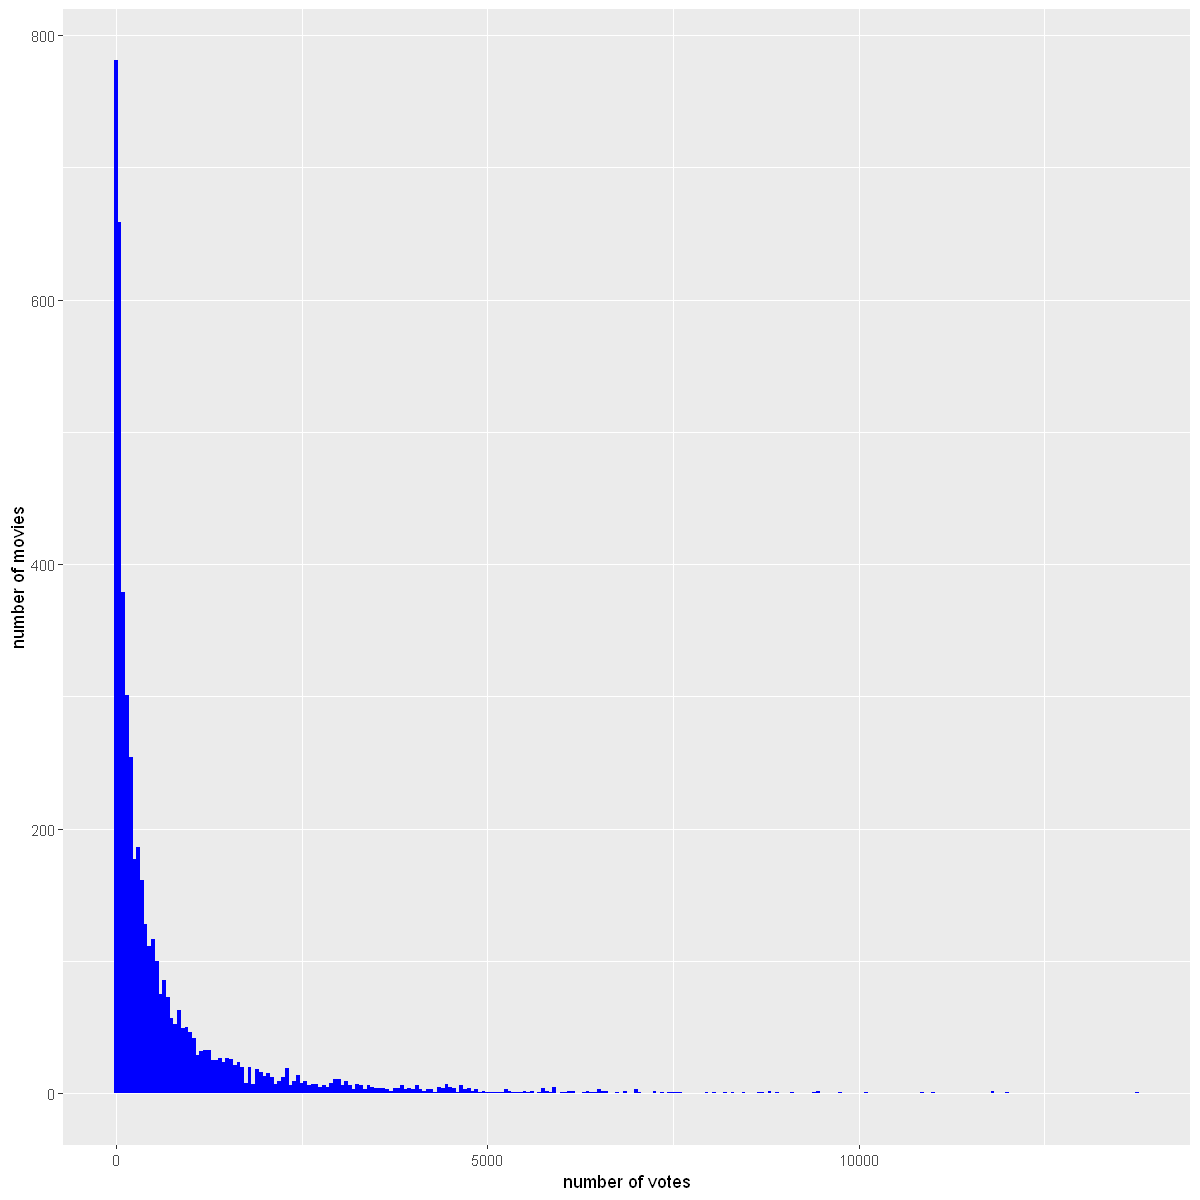

In [119]:

movies %>%
        ggplot(aes(x=vote_count)) +
        geom_histogram(fill="blue", binwidth = 50) +
        labs(x="number of votes", y="number of movies")

**As the Tail of histogram i.e. movies which have with more than 5,000 votes is barely visible. Lets only display the histogram to movies with less than 5000 votes.**

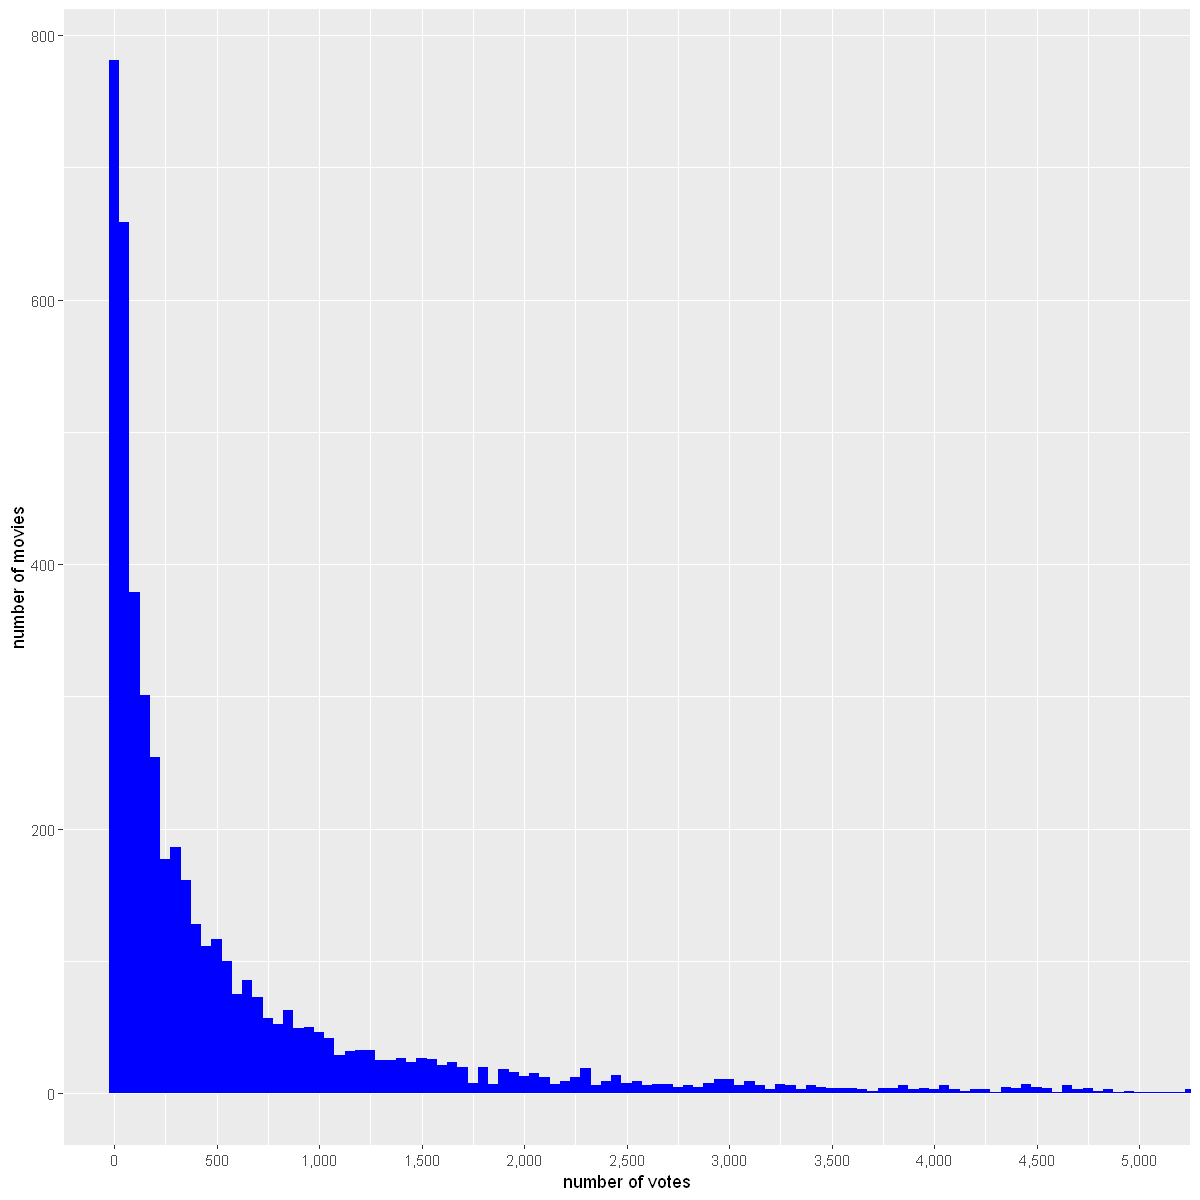

In [120]:
movies %>%
        ggplot(aes(x=vote_count)) +
        geom_histogram(fill="blue", binwidth = 50) +
        scale_x_continuous(breaks=seq(0, 5000, by=500), label=comma) +
        coord_cartesian(x=c(0, 5000)) +
        labs(x="number of votes", y="number of movies")

## Movies with the highest number of votes
- Creating a visual representation of movies with highest number of votes via bar graph
- When looking at the movies with most votes, we see that most of them had pretty good voting average too. The lowest vote_average within the Top20 movies with most votes is 6.8.

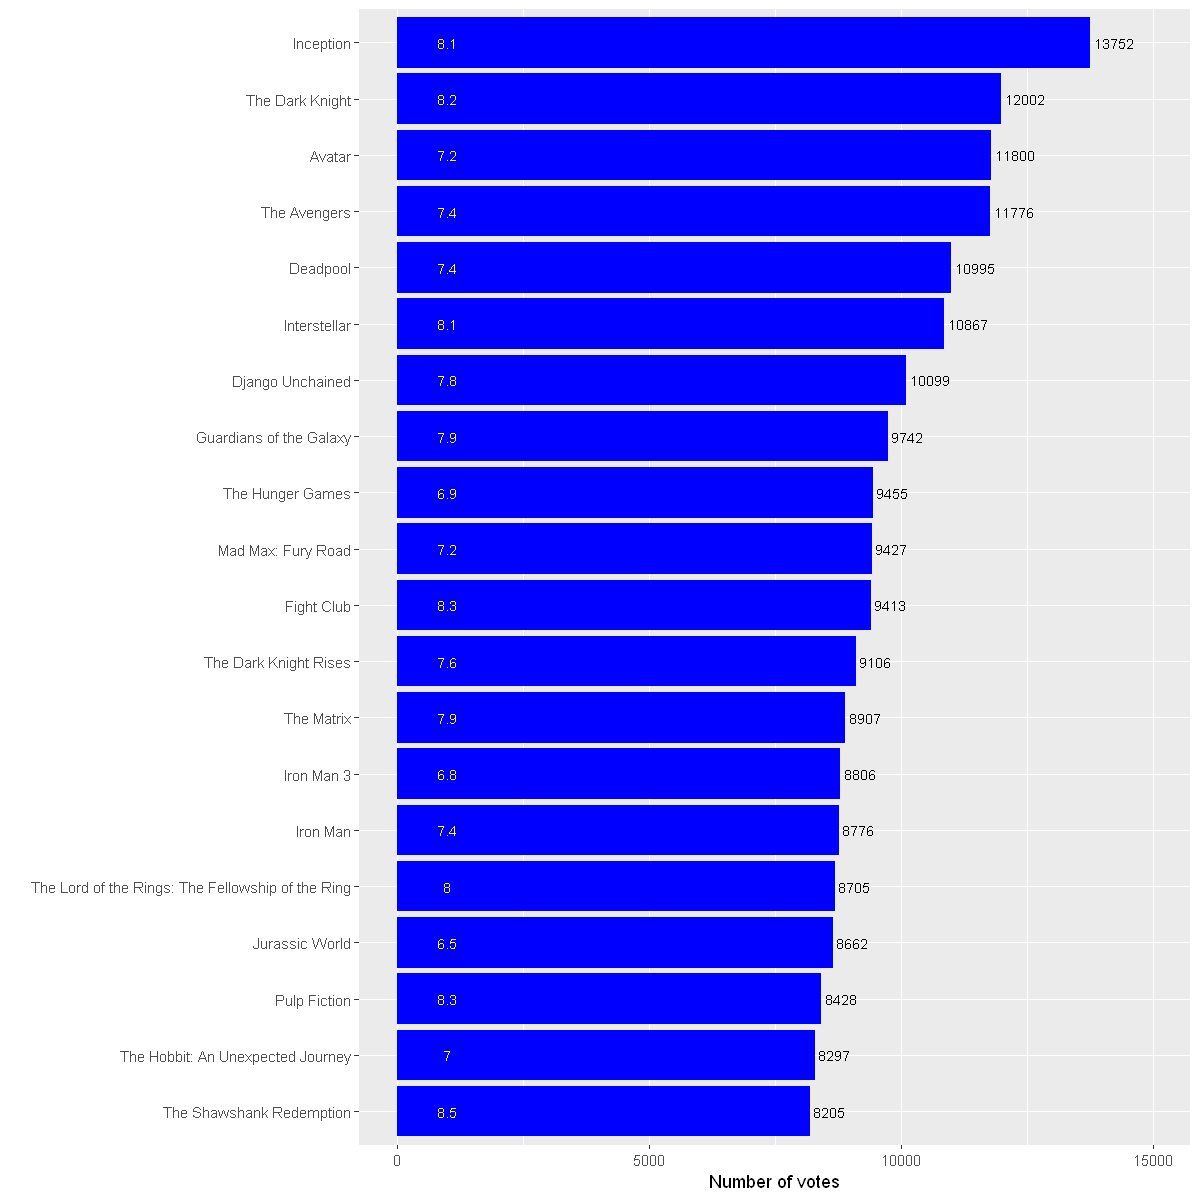

In [121]:
movies  %>% top_n(20, wt=vote_count) %>%
        ggplot(aes(x=reorder(title, vote_count), y=vote_count)) +
        geom_bar(stat='identity', fill="blue") + coord_flip(y=c(0, 15000)) +
        labs(x="", y="Number of votes") +
        geom_text(aes(label=vote_count), hjust=-0.1, size=3) +
        geom_text(aes(label=vote_average), y=1000, size=3, col="yellow")

## Average of Votes

### Histogram of vote average
- As you can see, the vote_average is left skewed, and the skew is -1.96.

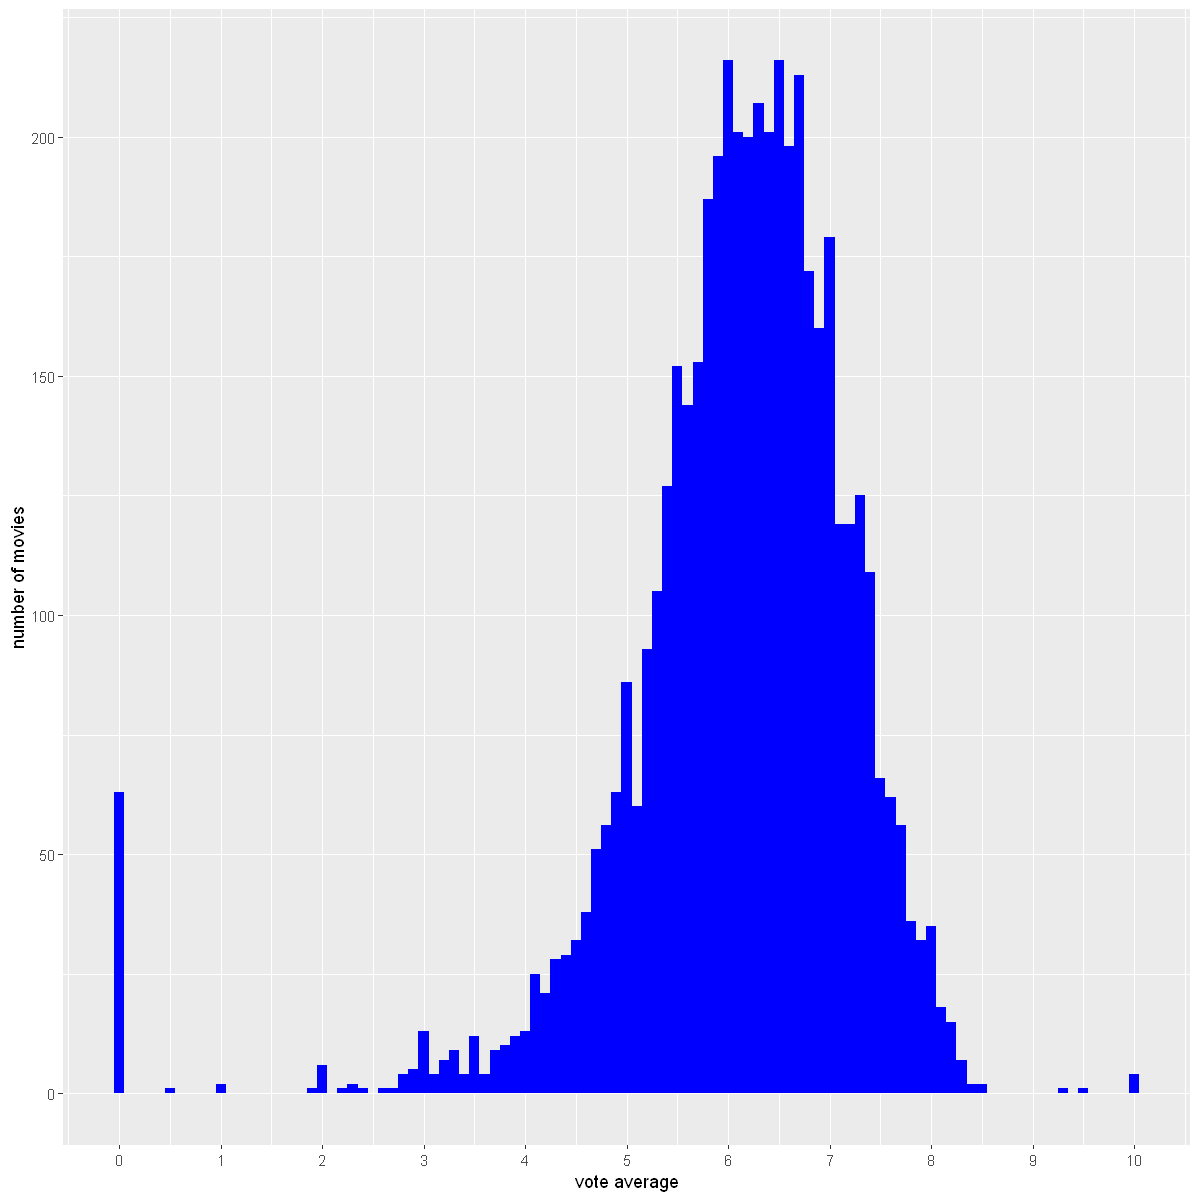

In [122]:
movies %>%
        ggplot(aes(x=vote_average)) +
        geom_histogram(fill="blue", binwidth = 0.1) +
        scale_x_continuous(breaks=seq(0, 10, by=1)) +
        labs(x="vote average", y="number of movies")

### FIlter the movies on vote_average below 4 or above 8.5. 
- As you can see, there are only 11 movies that “achieved” their vote_average in this range with at vote_count of at least 400.

In [123]:
movies %>% filter((vote_average<4.5|vote_average>8.5)& vote_count>=400) %>%
              select(id, title, vote_average, vote_count) %>% arrange(vote_average)

id,title,vote_average,vote_count
<dbl>,<chr>,<dbl>,<dbl>
14164,Dragonball Evolution,2.9,462
205321,Sharknado,3.8,476
1639,Speed 2: Cruise Control,4.1,434
71880,Jack and Jill,4.1,604
241251,The Boy Next Door,4.1,1022
415,Batman & Robin,4.2,1418
314,Catwoman,4.2,808
166424,Fantastic Four,4.4,2278
188207,The Legend of Hercules,4.4,533


### Movies with the highest vote average
- Filtering and displaying the top 20 of movies with the highest vote_average that received at least 250 votes.

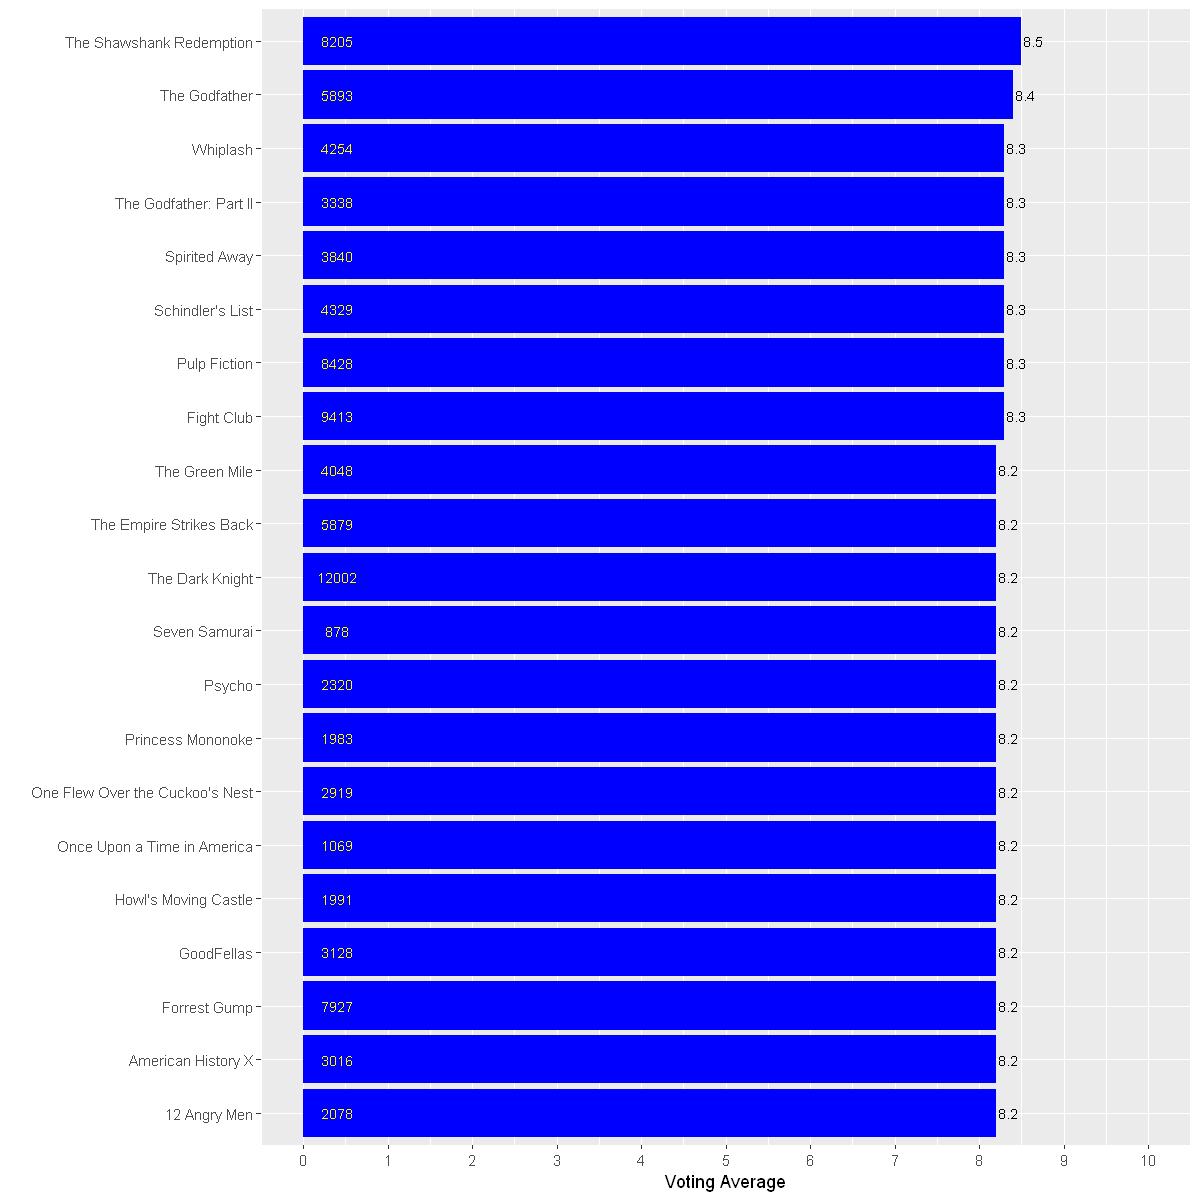

In [124]:
movies %>% filter(vote_count > 250) %>% top_n(20, wt=vote_average) %>%
        ggplot(aes(x=reorder(title, vote_average), y=vote_average)) +
        geom_bar(stat='identity', fill="blue") + coord_flip(y=c(0,10)) +
        labs(x="", y="Voting Average") +
        geom_text(aes(label=vote_average), hjust=-0.1, size=3) +
        scale_y_continuous(breaks=seq(0, 10, by=1)) +
        geom_text(aes(label=vote_count), y=0.4, size=3, col="yellow")

## Genre

### Numbers of movies by genre
- NOTE : a movie can be labeled with multiple genres.

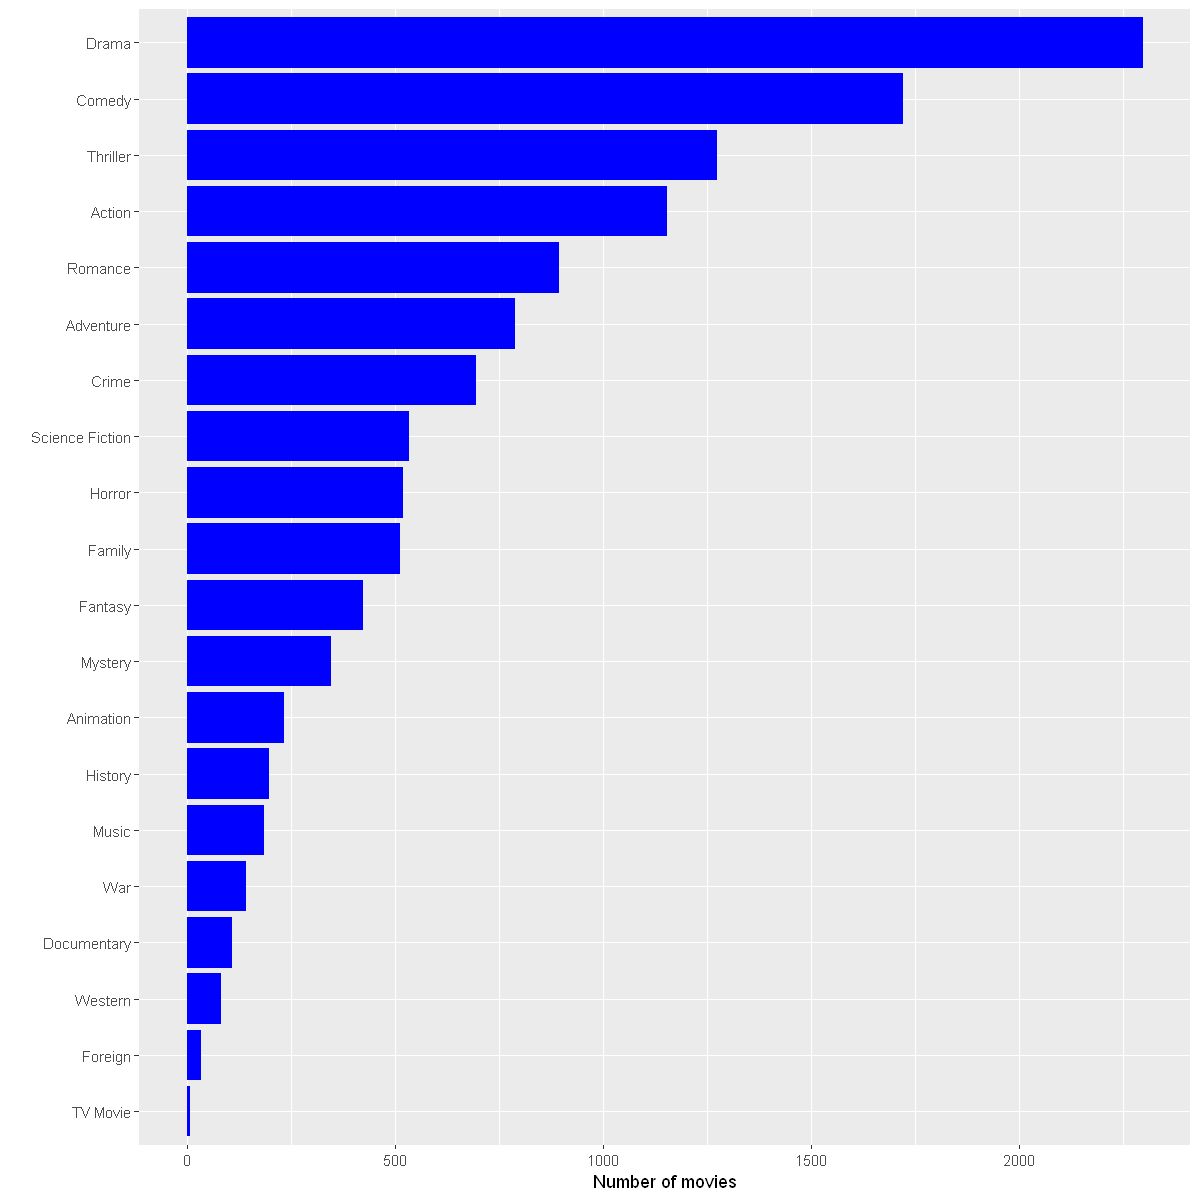

In [125]:
genres %>% group_by(genres) %>% count() %>%
        ggplot(aes(x=reorder(genres, n), y=n)) +
        geom_col(fill="blue") + coord_flip() +
        labs(x="", y="Number of movies")

### Highest rated movies by genre

In this section, I am displaying the Top10 of highest rated moves by genre. Again, I have only taken movies with at least 250 votes into consideration, and I am displaying all genres except the small genres “Foreign” and “TV movie”.

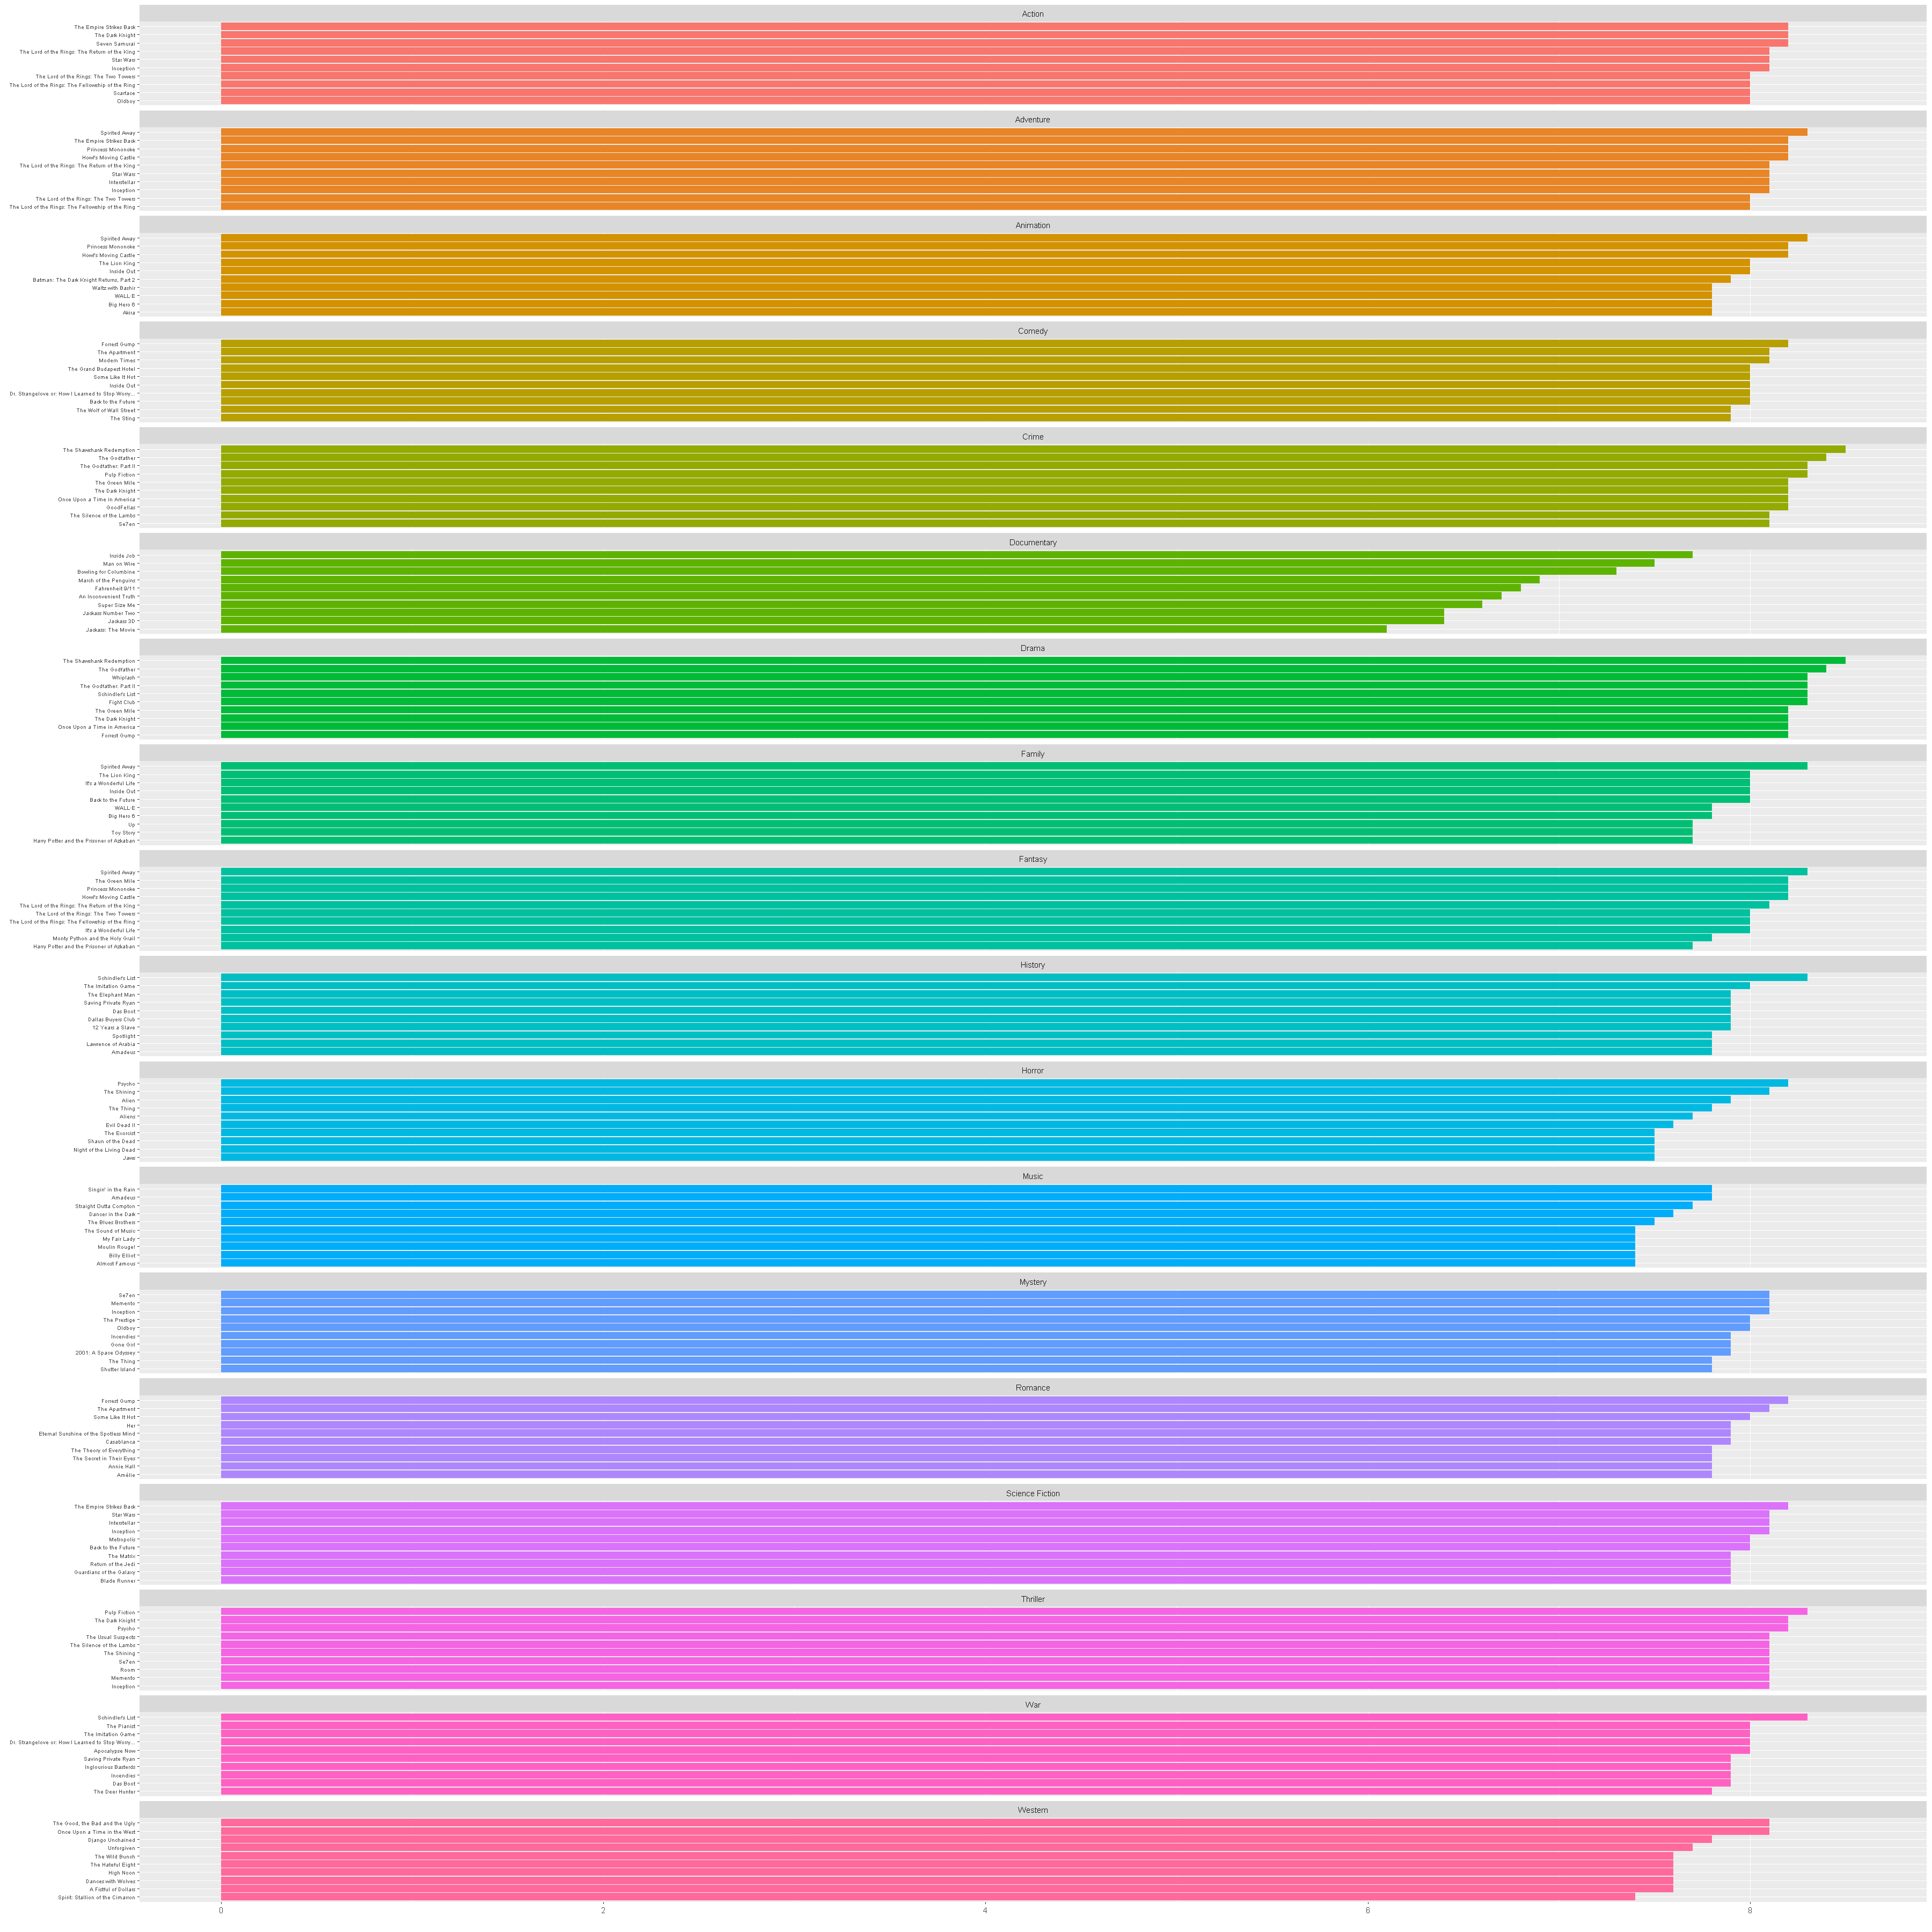

In [126]:
genres250 <- left_join(genres, movies %>% filter(vote_count > 250) %>% select(id, vote_average, vote_count, original_language, original_title), by = "id")
genres250 <- genres250 %>% filter(!is.na(genres250$vote_average))
genres250$title <- str_trunc(as.character(genres250$title), width = 50, side="right")
genres250$title <- as.factor(genres250$title)

options(repr.plot.width=30, repr.plot.height=30)

genres250 %>% filter(!genres %in% c("Foreign", "TV Movie")) %>%
        group_by(genres) %>% arrange(desc(vote_average)) %>% slice(1:10) %>%
        ggplot(aes(x=reorder(title, vote_average), y=vote_average)) +
        geom_col(aes(fill=genres), show.legend = FALSE) + coord_flip() +
        facet_wrap(~genres, scales = "free_y", ncol=1) +
        labs(x="", y="") +
        theme(axis.text.y = element_text(size=6))

## Popular Directors and actors

### Top 20 Actors with most appearances

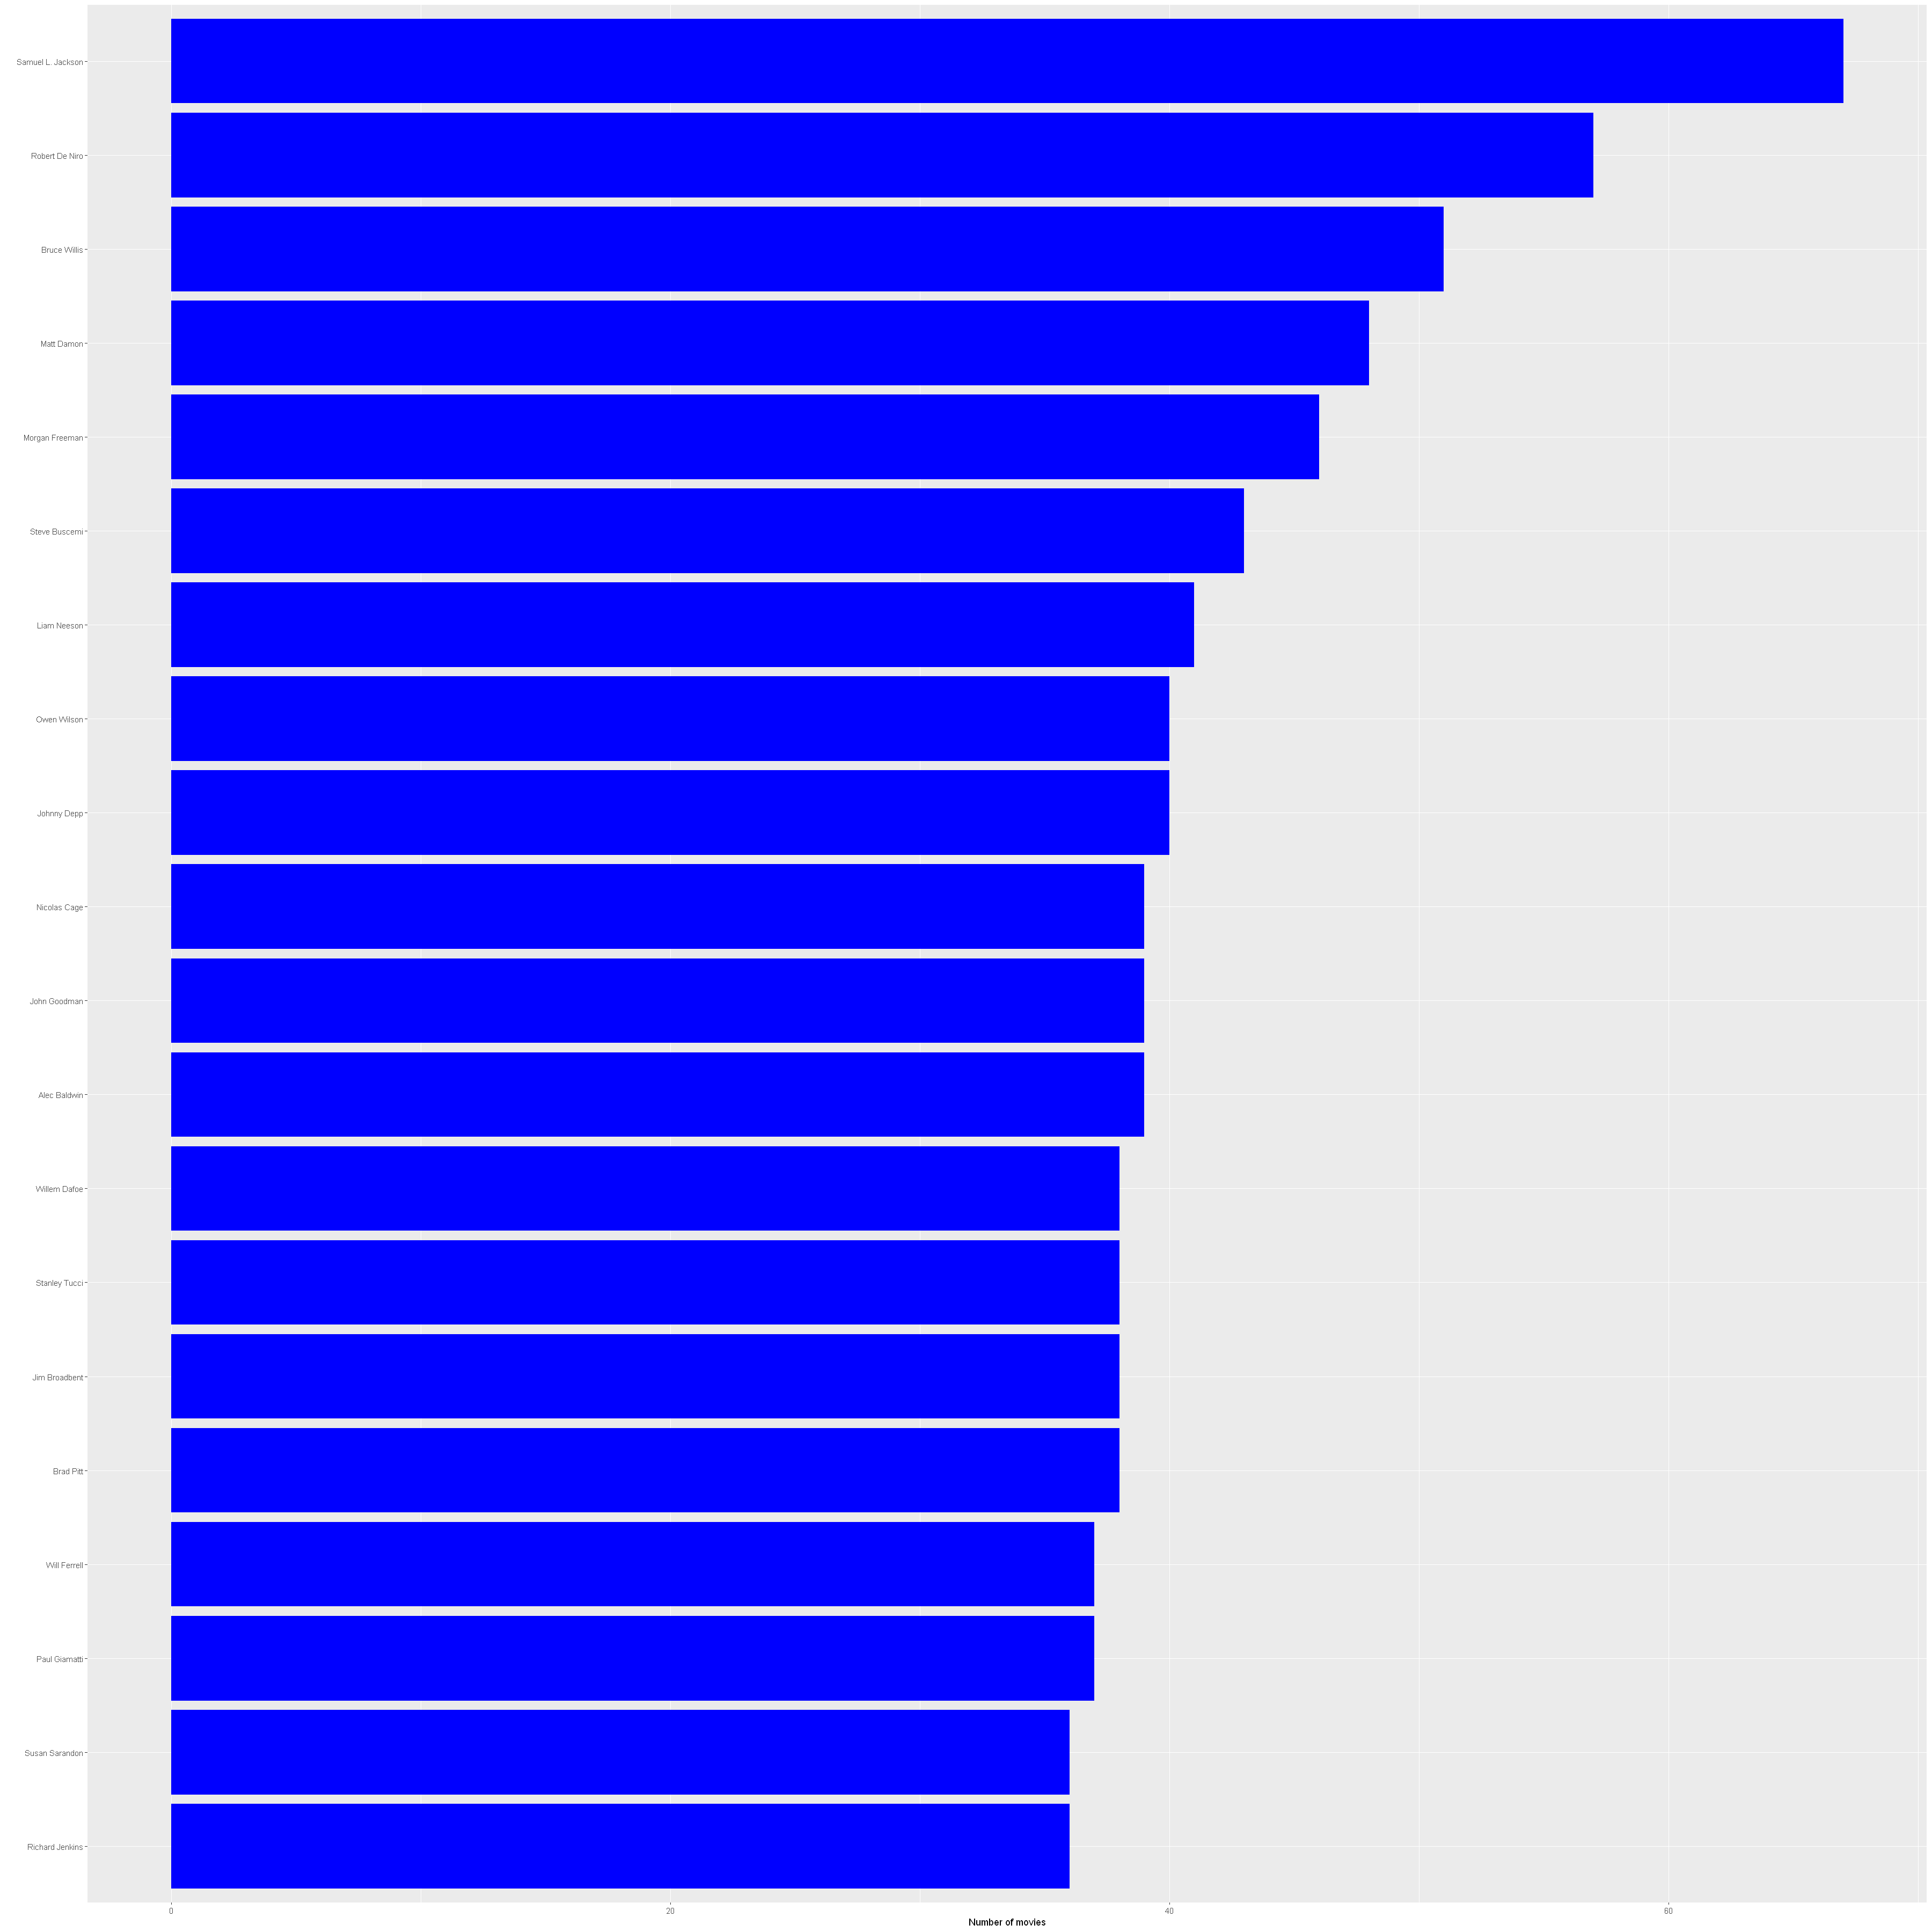

In [127]:
cast1 %>% top_n(20, wt=n)%>%
        ggplot(aes(x=reorder(actor, n), y=n)) +
        geom_col(fill="blue") + coord_flip() +
        labs(x="", y="Number of movies")

### Top 20 Directors who directed most movies.

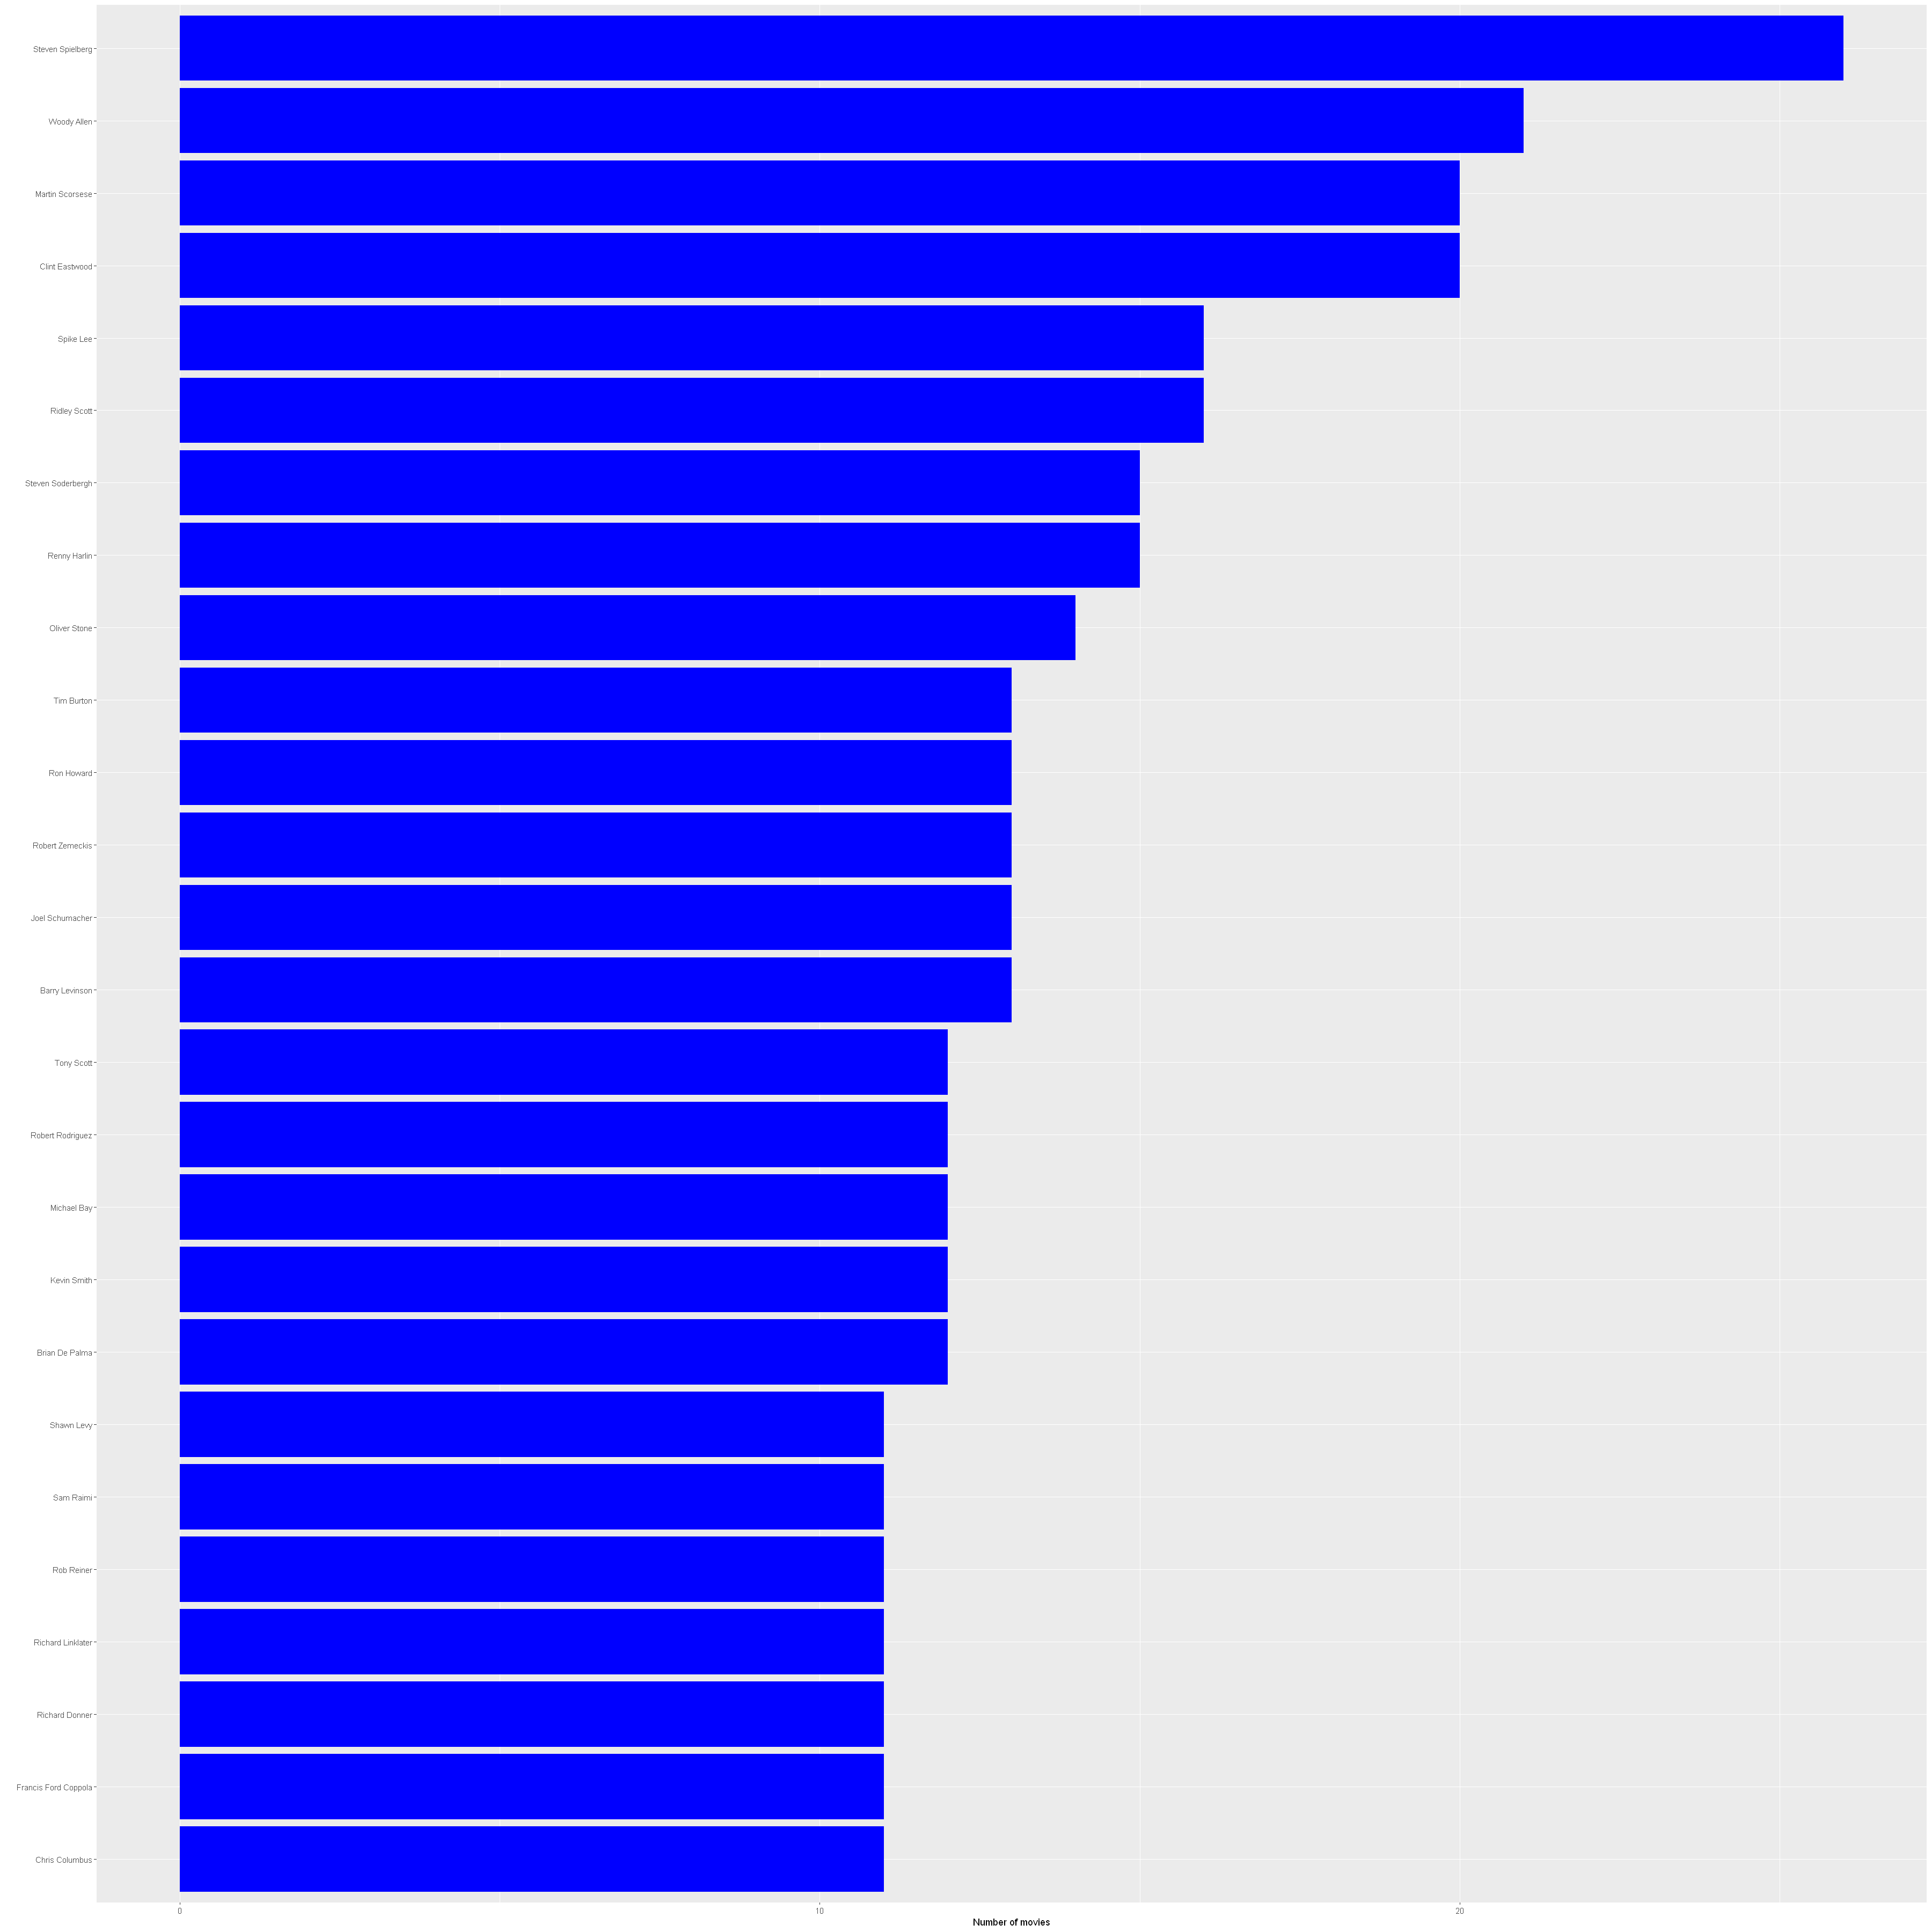

In [128]:
movies %>% filter(!is.na(movies$director)) %>% count(director) %>% top_n(20, wt=n)%>%
        ggplot(aes(x=reorder(director, n), y=n)) +
        geom_col(fill="blue") + coord_flip() +
        labs(x="", y="Number of movies")

## Keywords 

### Number of distinct keywords int the Data
- From the result we can see that TMBD uses 9,813 keywords to describe its movies.

In [129]:
n_distinct(keywords$keyword)

[1] 9813

###  Top 20 Most-used Keywords


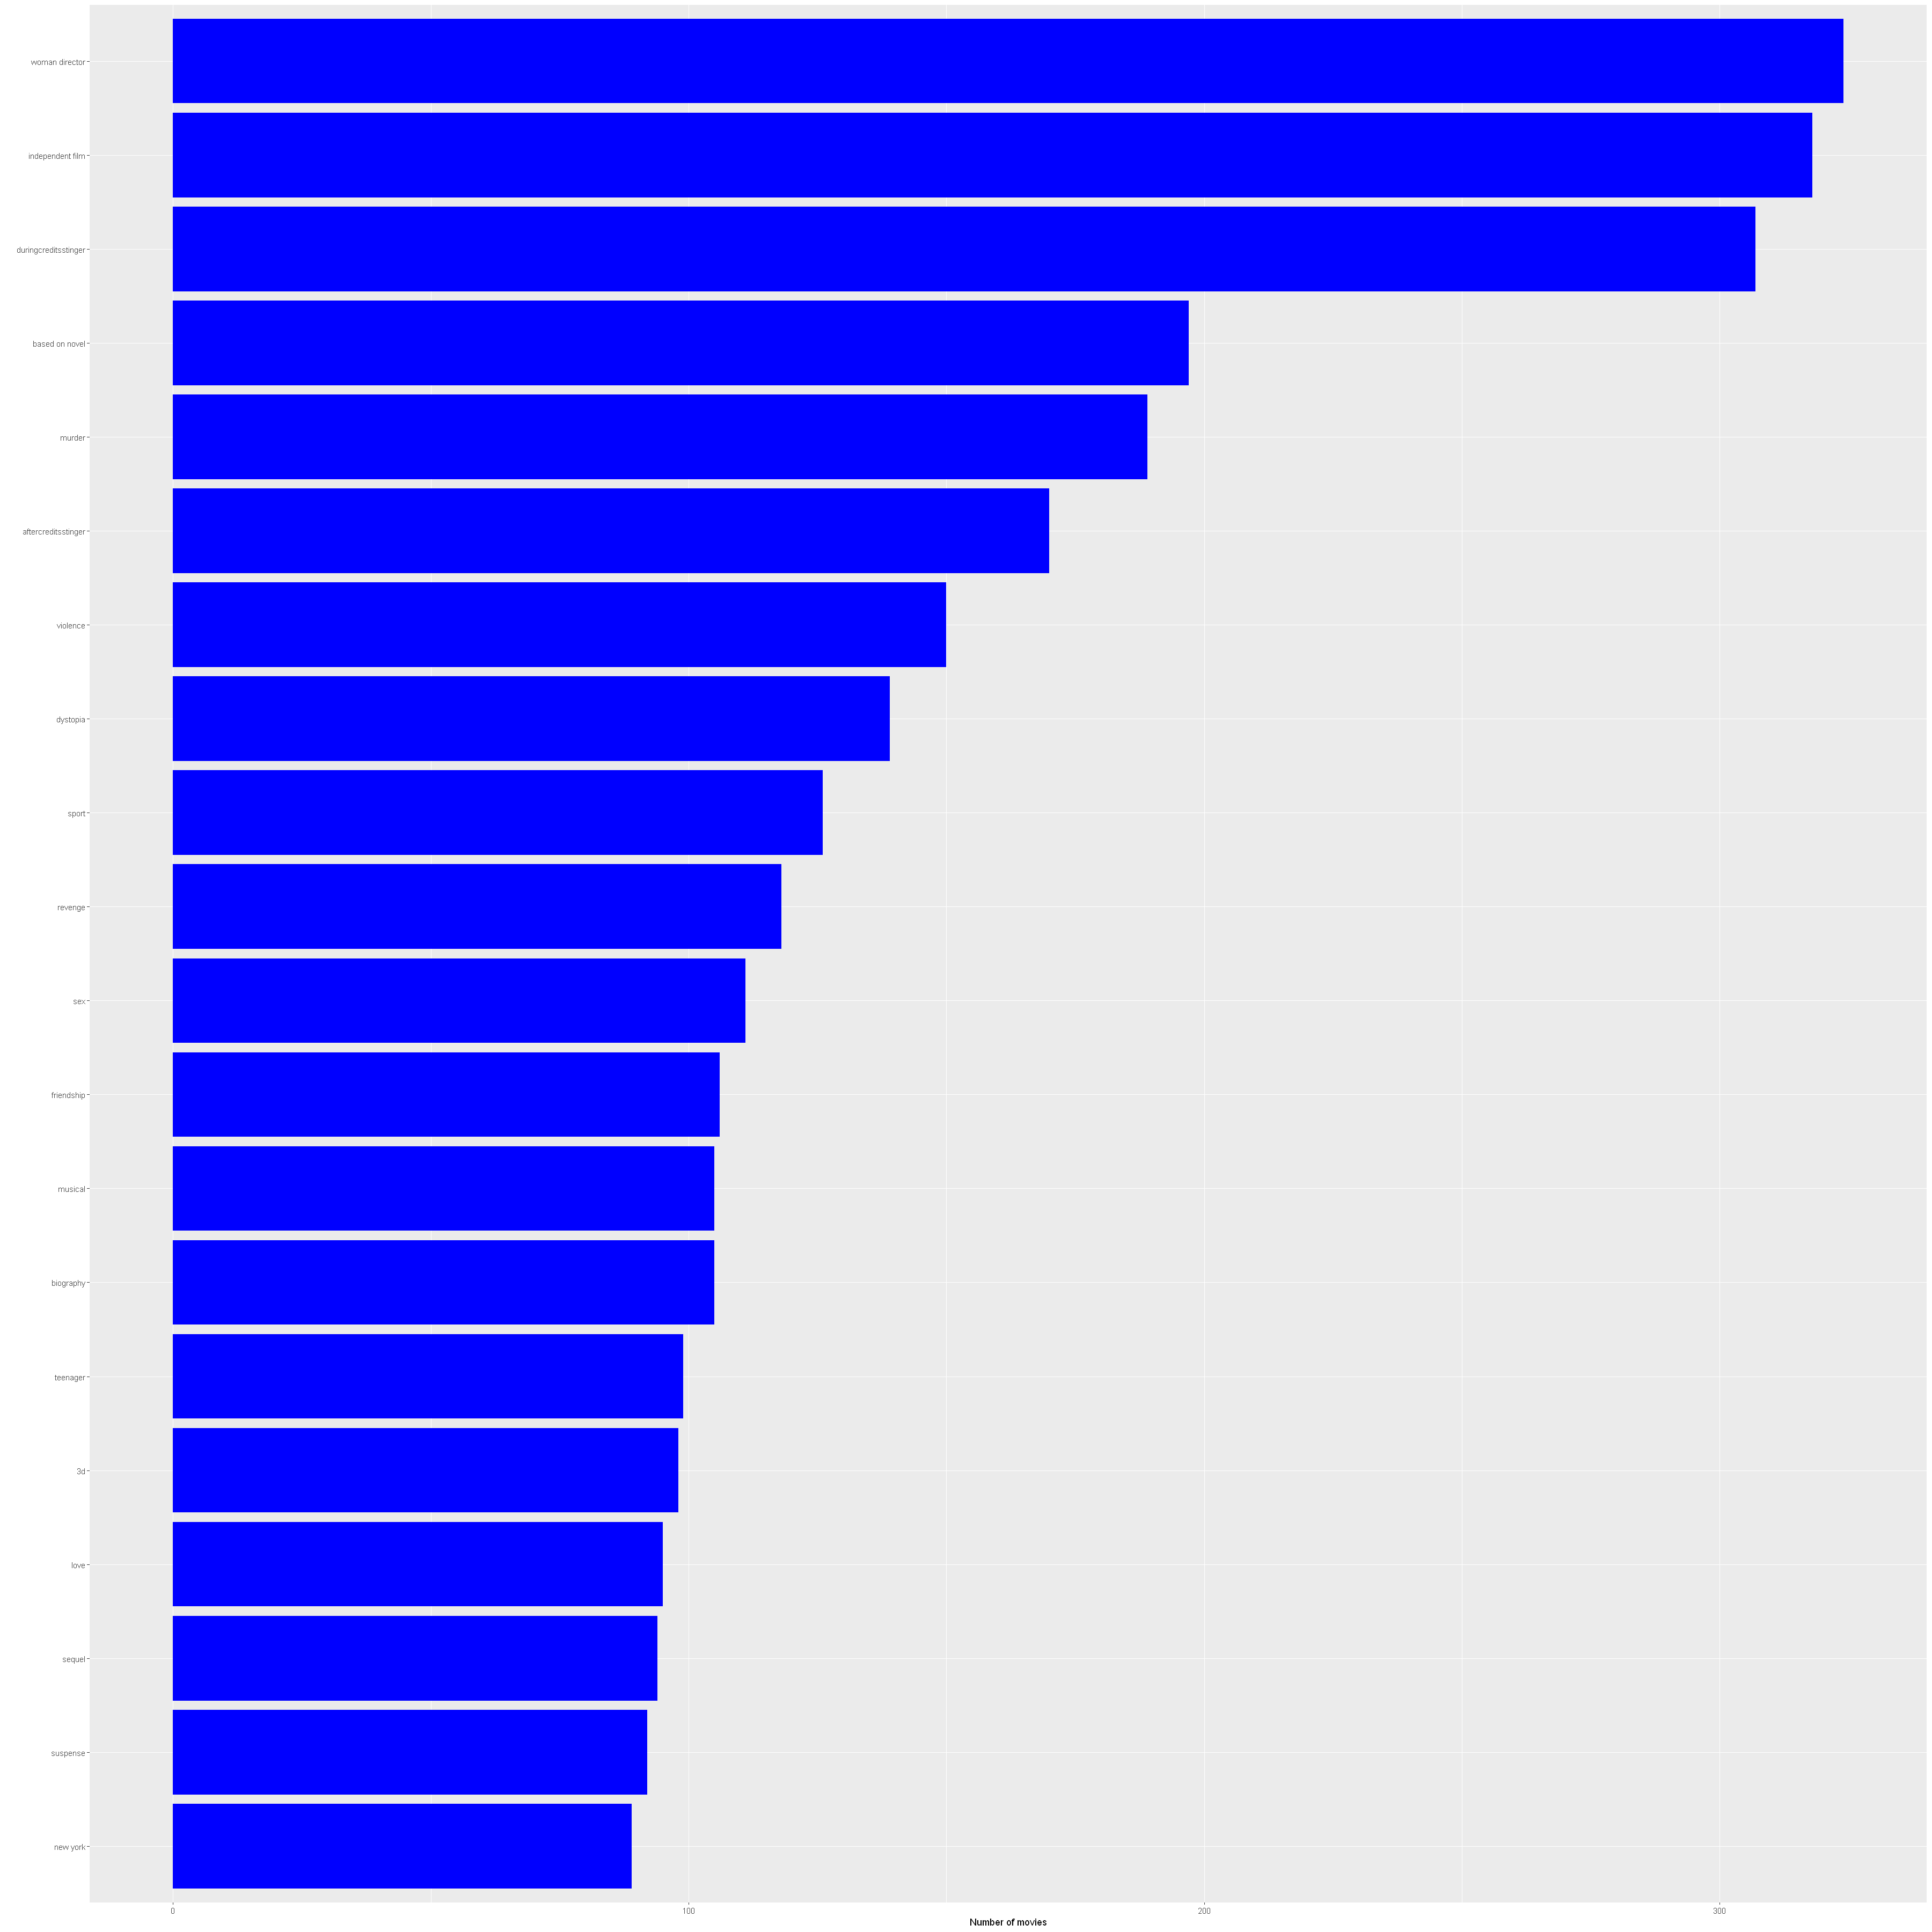

In [130]:
keywords %>% count(keyword) %>% top_n(20, wt=n) %>%
        ggplot(aes(x=reorder(keyword, n), y=n)) +
        geom_col(fill="blue") + coord_flip() +
        labs(x="", y="Number of movies")

### Wordcloud of keywords 

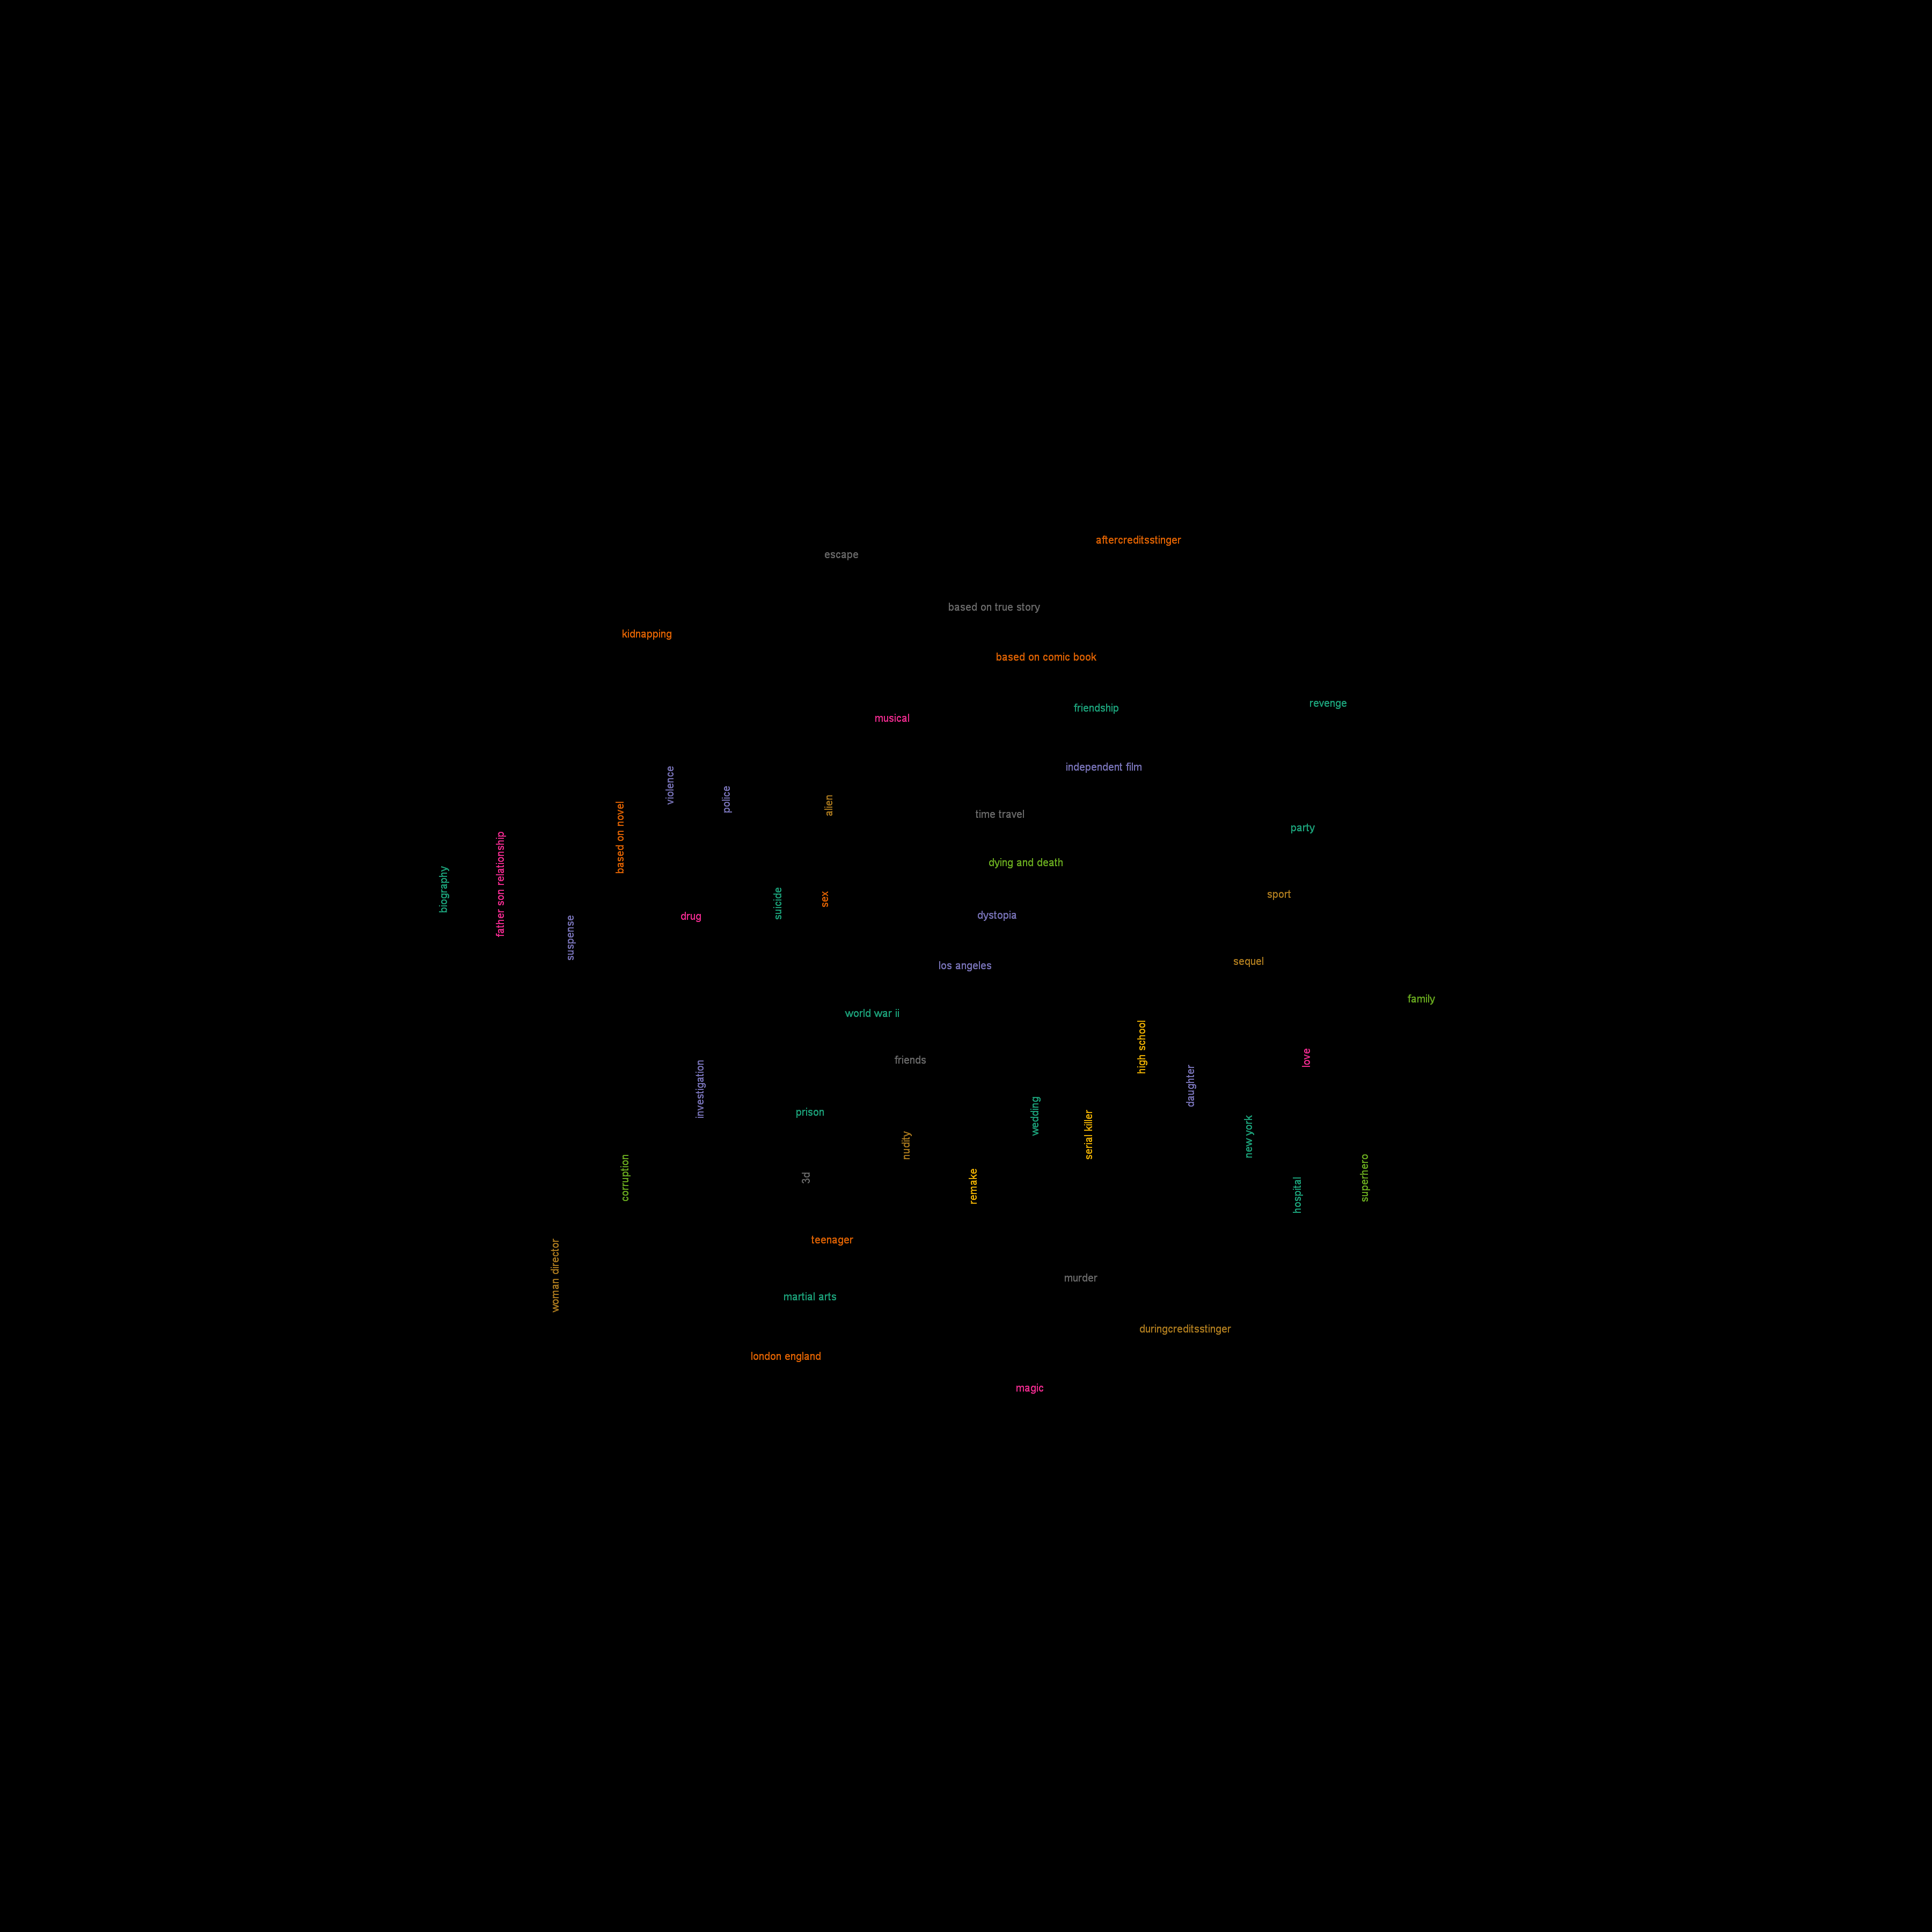

In [131]:
set.seed(2019)

keywords_counts <- keywords %>% count(keyword)

par(mfrow=c(1, 1),bg="black")
wordcloud(keywords_counts$keyword, keywords_counts$n, max.words = 50, scale=c(1,1), 
          random.color = TRUE, random.order=TRUE, rot.per=0.3, colors=brewer.pal(8, "Dark2"))


### Histogram of the number of keywords per movie


dummy <- keywords %>% count(id, title)
dummy %>%
        ggplot() +
        geom_histogram(aes(x=n), breaks = seq(0, 100, by=2), fill="blue") +
        scale_x_continuous(breaks = seq(0, 100, by=10)) +
        labs(x="Number of keywords per movie. Binwidth=2", y= "Number of Movies")

## Release year

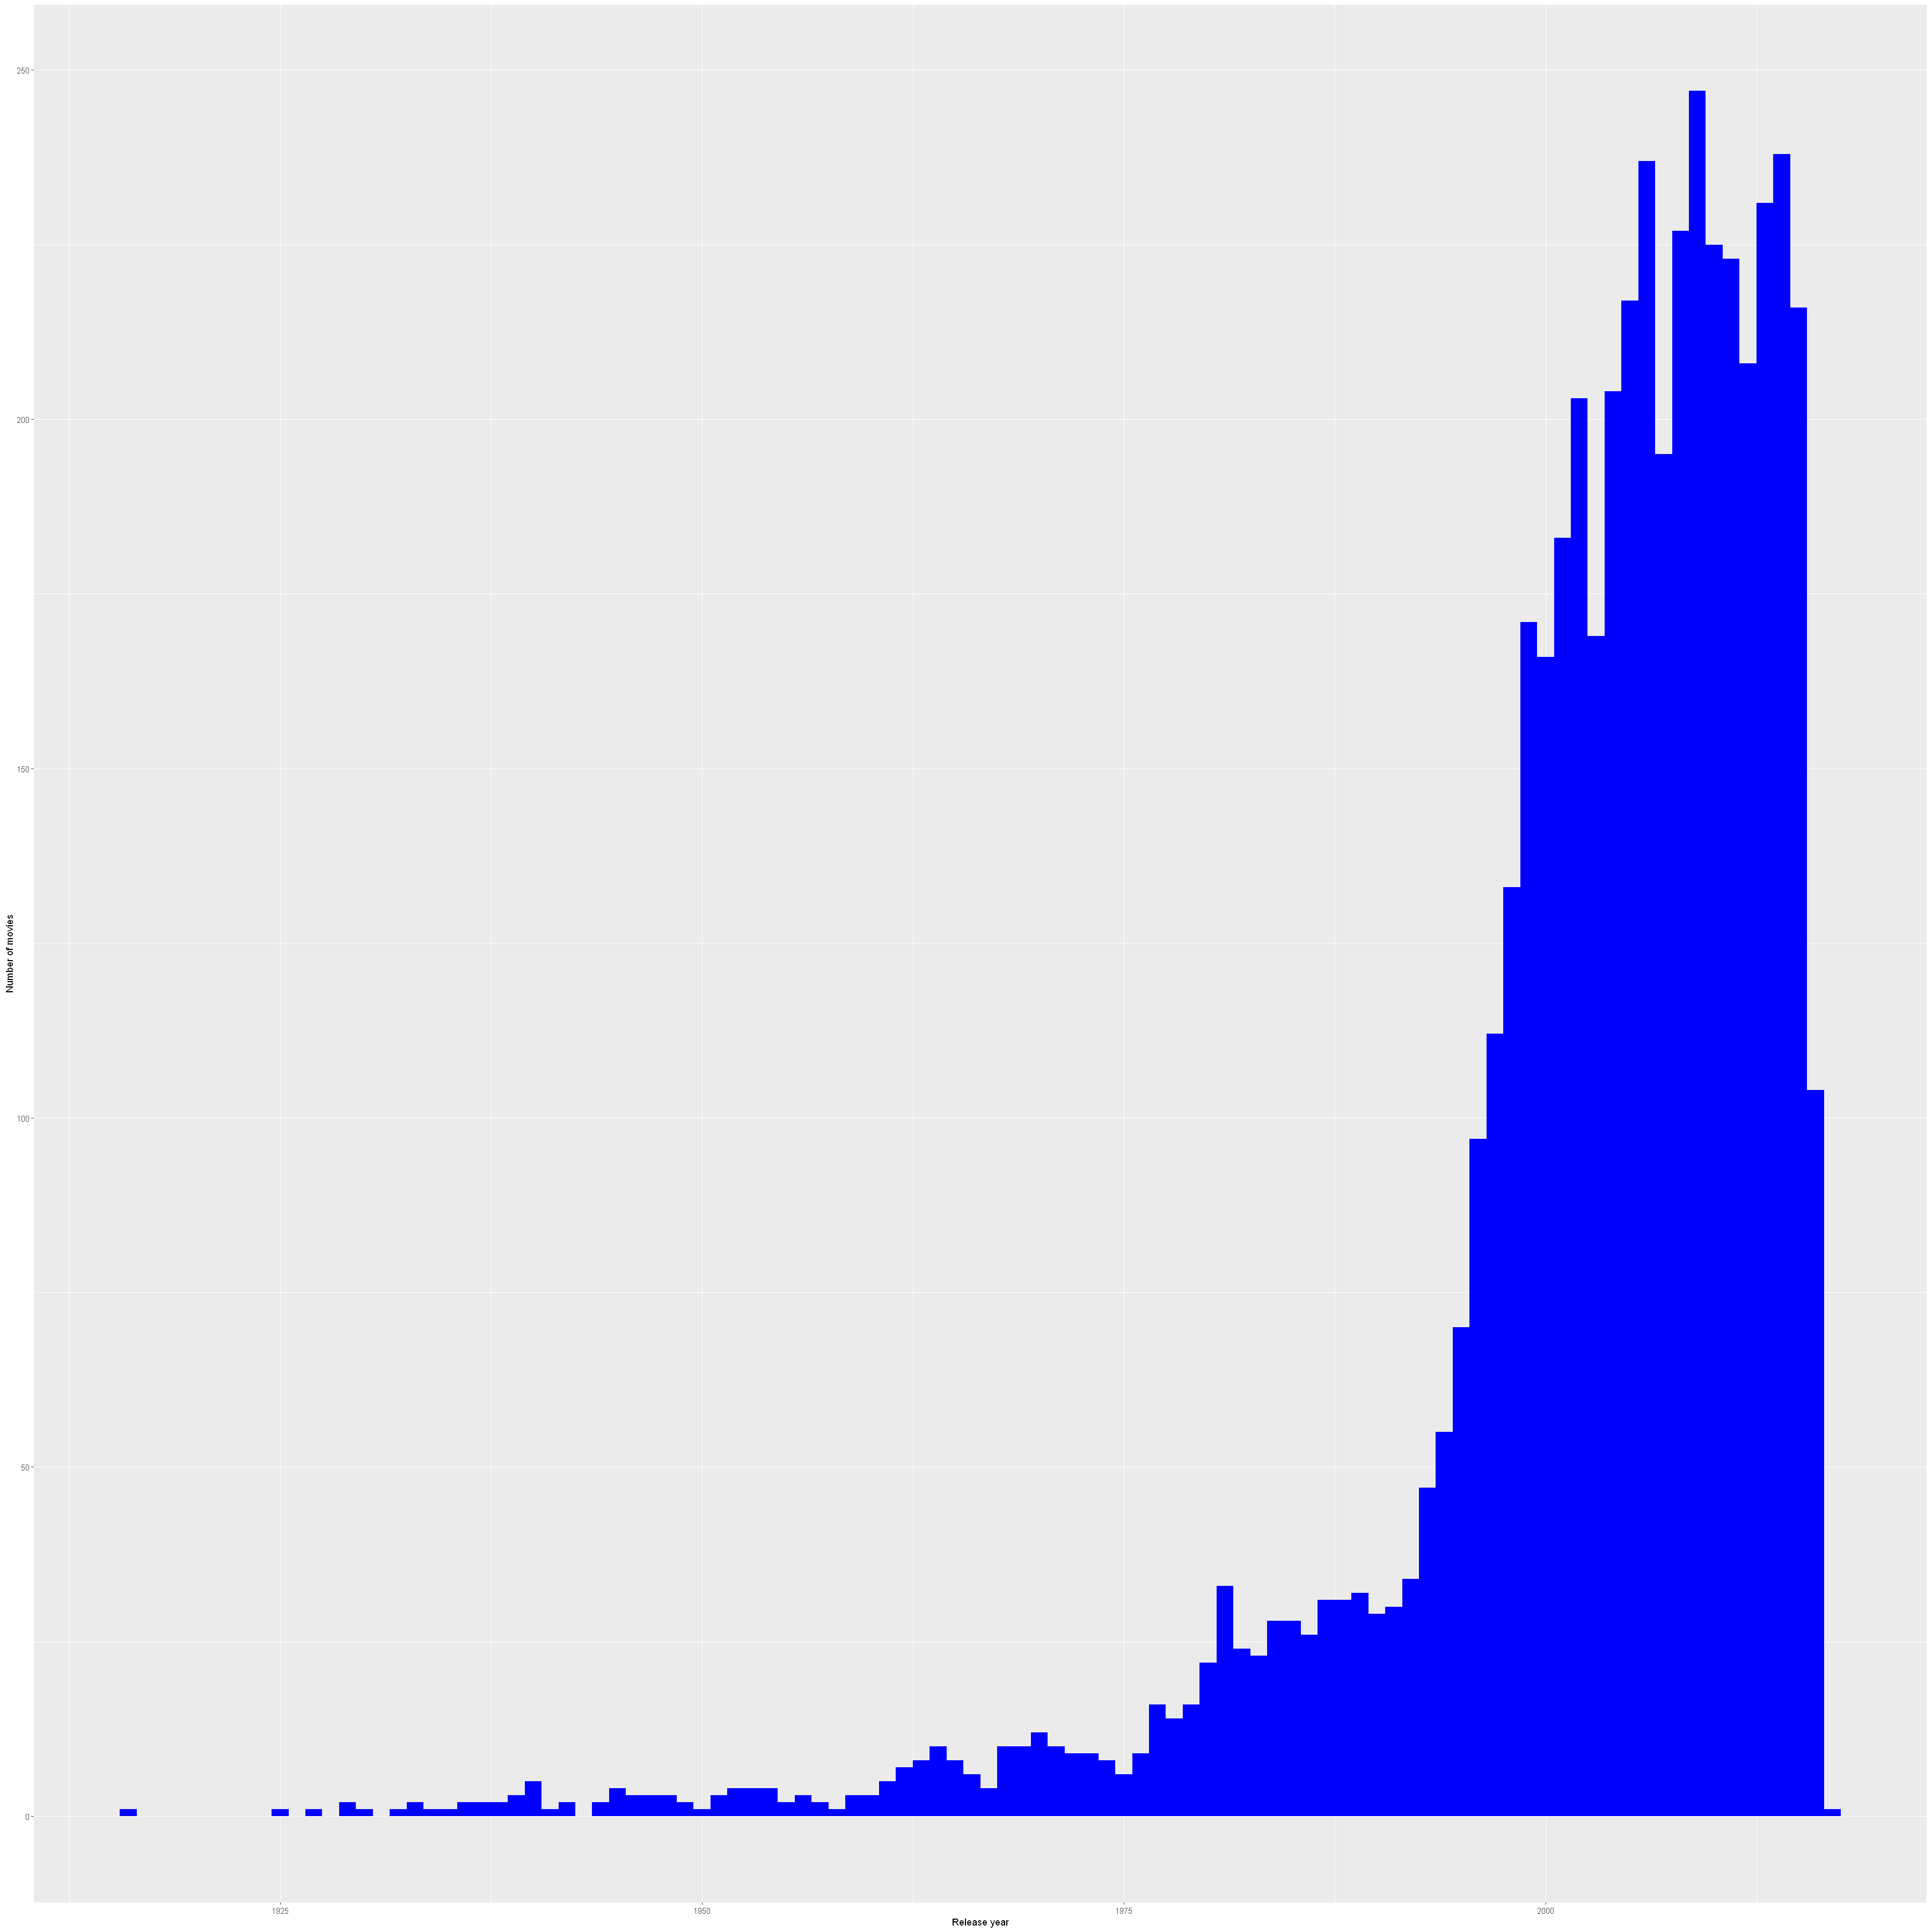

In [132]:
movies$release_year <- year(movies$release_date)

movies %>%
ggplot(aes(x=release_year)) +
geom_histogram(fill="blue", binwidth = 1) +
labs(x="Release year", y="Number of movies")

# Recommendation Systems

## Calculating the Weighted Rating (using the IMDB formula)

IMDB does not use the plain movie vote_averages as the score to for instance compose its Top250. Instead,it uses a formula that also takes the number of votes into account. The formula is (source Wikipedia):

W=R∗v+C∗mv+m

Where:

    W = weighted rating
    R = average rating for the movie as a number from 1 to 10 (vote_average)
    v = number of votes for the movie (vote_count)
    m = minimum votes required to be listed in the Top 250 (currently 25,000)
    C = the mean vote across the whole report

Below, we calculate m and C. C is 6.09 for this dataset. For C, we take the 75% quantile. This leads to m being 737.

In [133]:
C <- mean(movies$vote_average)
m <- quantile(movies$vote_count, 0.75)

In [134]:
movies$weighted_rating <- (movies$vote_average*movies$vote_count + C*m)/(movies$vote_count + m)

Visualizing the movies within Top 20 wrt weighted ratings

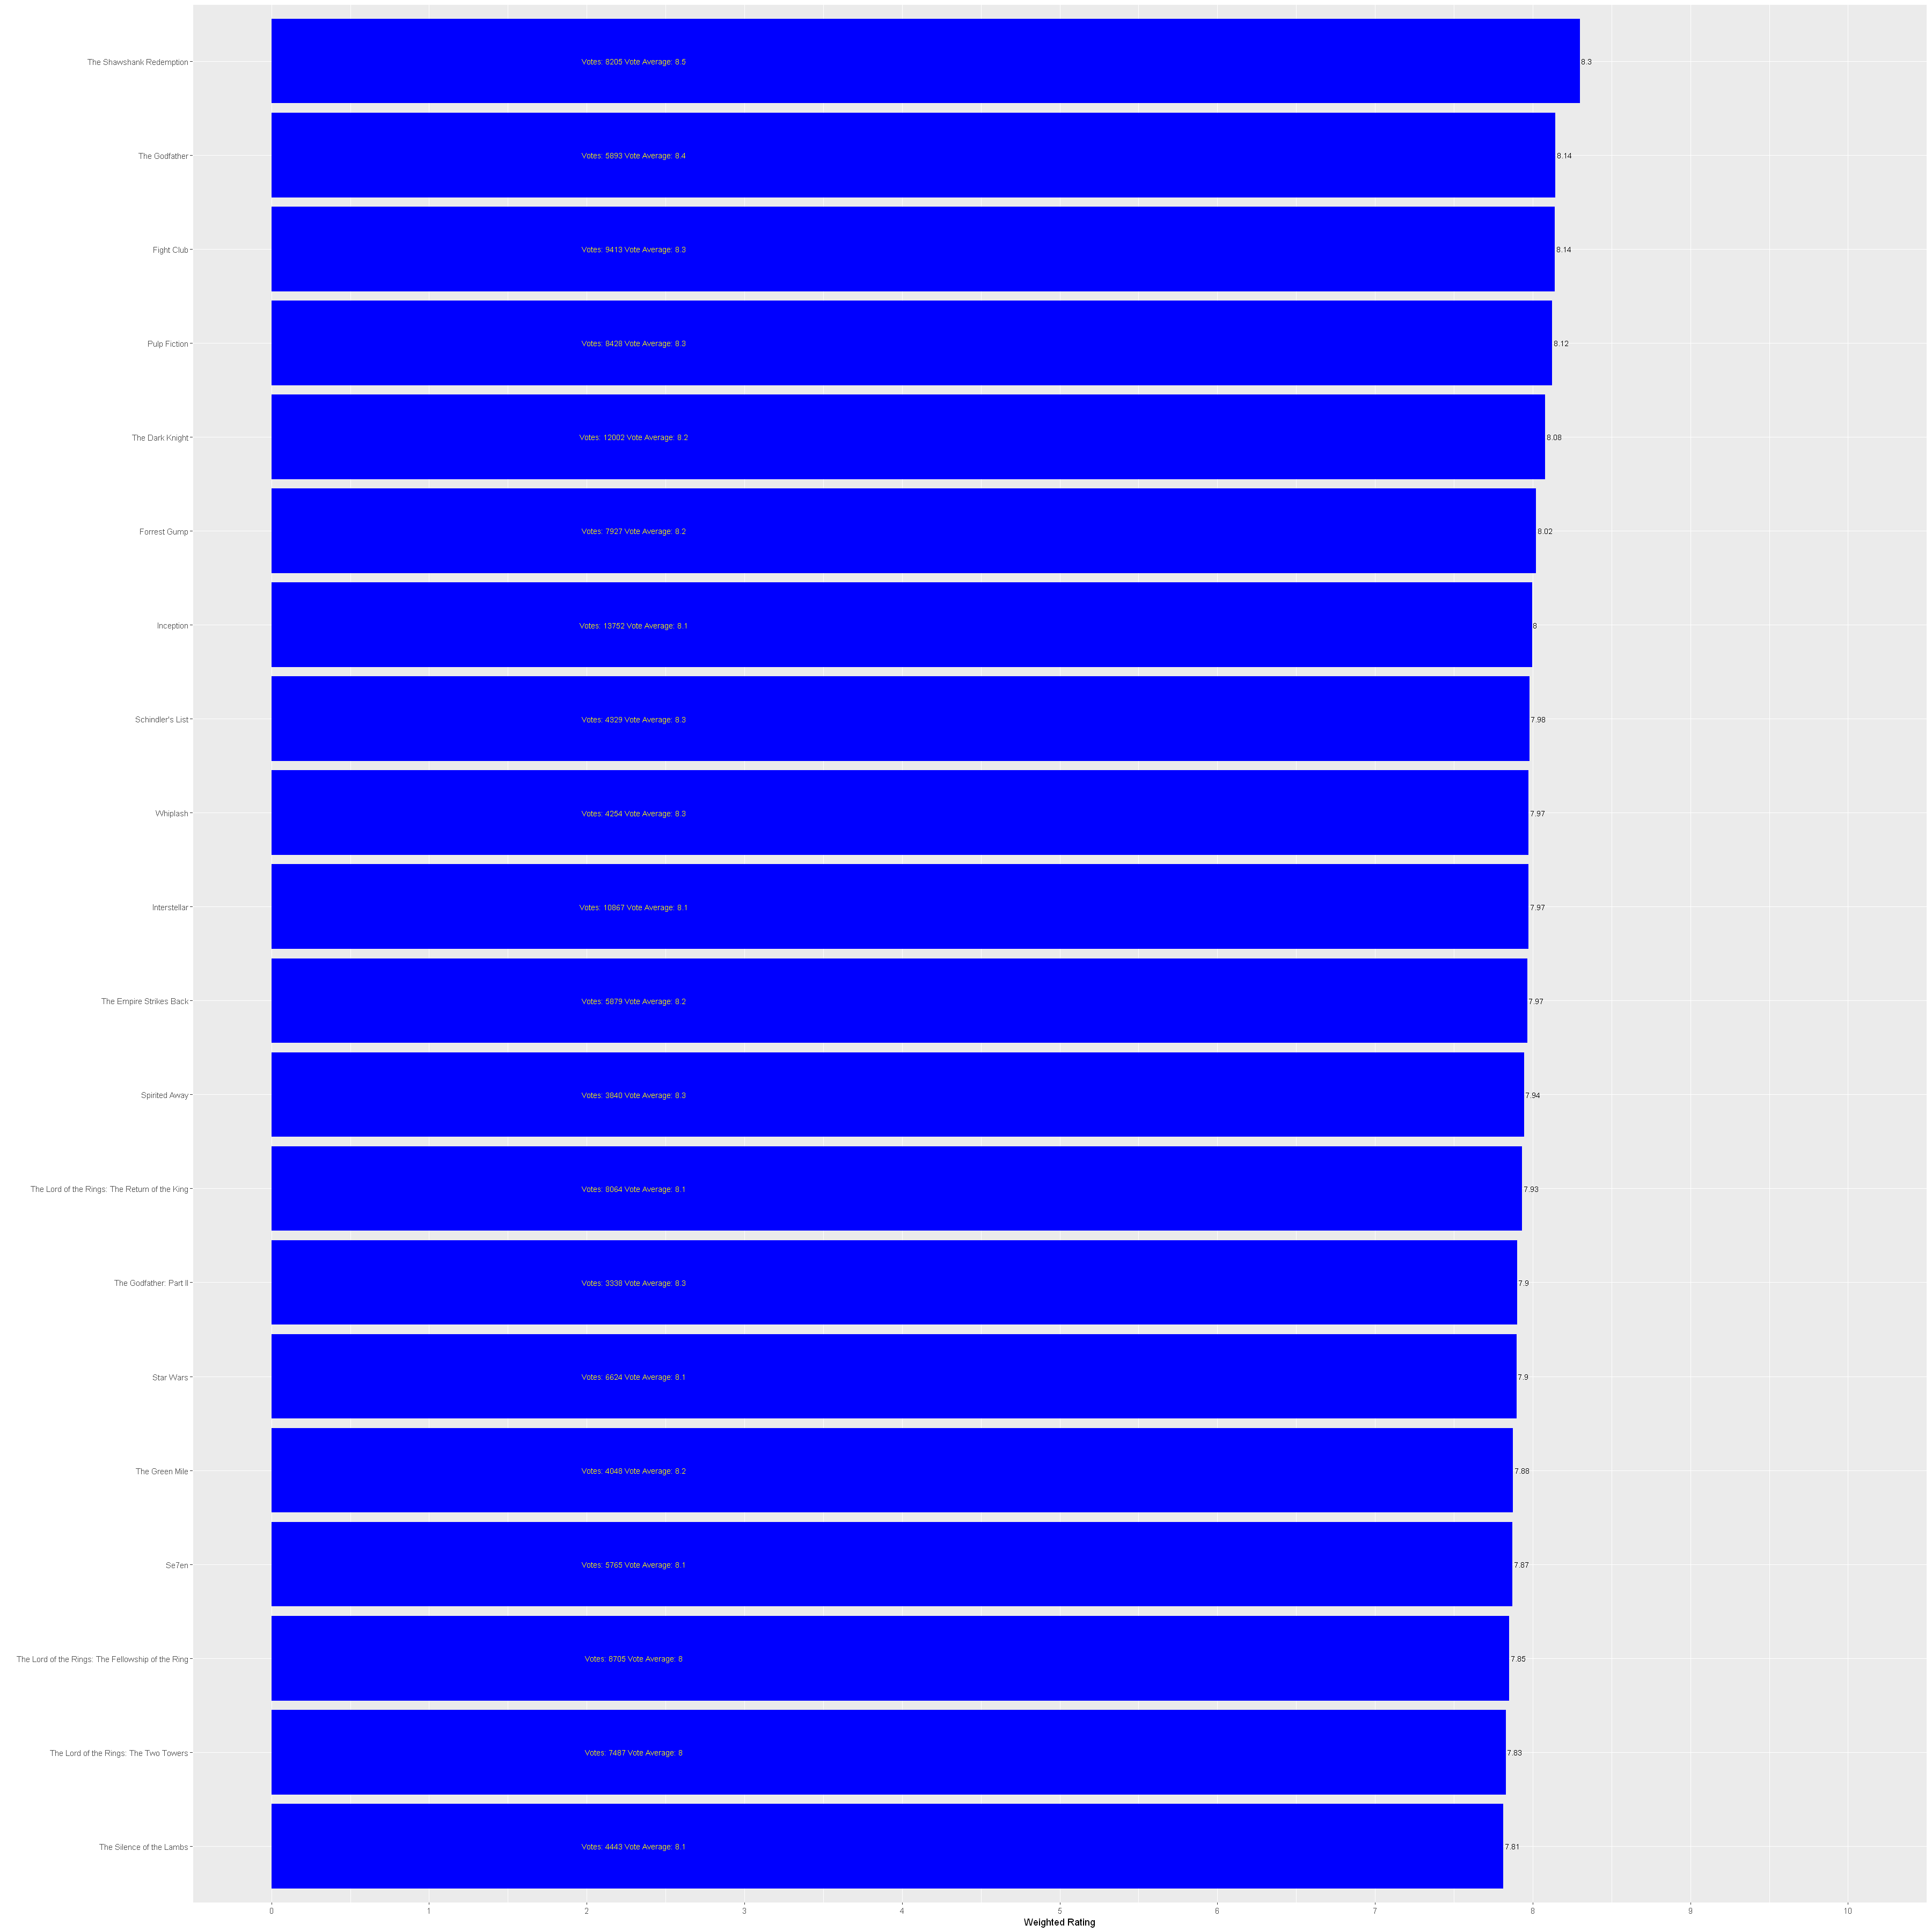

In [135]:
movies %>% top_n(20, wt=weighted_rating) %>%
        ggplot(aes(x=reorder(title, weighted_rating), y=weighted_rating)) +
        geom_bar(stat='identity', fill="blue") + coord_flip(y=c(0,10)) +
        labs(x="", y="Weighted Rating") +
        geom_text(aes(label=round(weighted_rating, 2)), hjust=-0.1, size=3) +
        scale_y_continuous(breaks=seq(0, 10, by=1)) +
        geom_text(aes(label=paste("Votes:", vote_count, "Vote Average:", vote_average)), y=2.3, size=3, col="yellow")

## Basic Recommendations (Genre and Language based)

Simple recommenders: 
Offer generalized recommendations to every user, based on movie popularity and/or genre. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

Here we use Genres and language and recommend movies based on their weighted ratings.

In [137]:
movies <- movies %>% select(
    budget,genres,id,original_language,popularity,
    release_date,title,vote_average,vote_count,genre_1,
    genre_2, genre_3, actor_1, actor_2, actor_3, director,
    release_year, weighted_rating
)

In [138]:
genres250 <- left_join(genres250, movies %>% select(id, weighted_rating), by="id")

recommendGenreLanguage <- function(Genre, Language="en") {
        genres250 %>% filter(original_language==Language & genres==Genre) %>%
                arrange(desc(weighted_rating)) %>% slice(1:5)
}

Sample Genre based recommendation, default language is English:

In [139]:
recommendGenreLanguage("Drama")

id,title,genres,vote_average,vote_count,original_language,original_title,weighted_rating
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
278,The Shawshank Redemption,Drama,8.5,8205,en,The Shawshank Redemption,8.301547
238,The Godfather,Drama,8.4,5893,en,The Godfather,8.143459
550,Fight Club,Drama,8.3,9413,en,Fight Club,8.139688
155,The Dark Knight,Drama,8.2,12002,en,The Dark Knight,8.078054
13,Forrest Gump,Drama,8.2,7927,en,Forrest Gump,8.020698


Sample Genre and language based recommendation (we use Spanish here):

In [140]:
recommendGenreLanguage("Drama", "es")

id,title,genres,vote_average,vote_count,original_language,original_title,weighted_rating
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1417,Pan's Labyrinth,Drama,7.6,3041,es,El laberinto del fauno,7.305858
25376,The Secret in Their Eyes,Drama,7.8,626,es,El secreto de sus ojos,6.876545
55,Amores perros,Drama,7.6,521,es,Amores perros,6.716638
6537,The Orphanage,Drama,7.1,633,es,El orfanato,6.557832
219,Volver,Drama,7.3,406,es,Volver,6.521199


## Content-based Recommendations

Here we find similar movies based on the actors, director, keywords, and genres.
We composed a function that recommends 5 similar movies for a movie. We sort all other movies based on:

- The number of similarities (same director, same actors, same genres).
- When the number of similarities is the same for a number of movies, we sort them on descending weighted rating.

In [141]:
similarity_vars <- c("actor_1", "actor_2", "actor_3", "director", "genre_1", "genre_2", "genre_3")

movies_filter <- movies %>% select(id, title, !!similarity_vars)
movies_filter <- movies_filter %>% mutate_if(is.factor, as.character)

recommend_similar <- function(movie){
    
    director <- movies_filter$director[movies_filter$id==movie]
    actor1 <- movies_filter$actor_1[movies_filter$id==movie]
    actor2 <- movies_filter$actor_2[movies_filter$id==movie]
    actor3 <- movies_filter$actor_3[movies_filter$id==movie]
    genre1 <- movies_filter$genre_1[movies_filter$id==movie]
    genre2 <- movies_filter$genre_2[movies_filter$id==movie]
    genre3 <- movies_filter$genre_3[movies_filter$id==movie]

    rec_df <- movies_filter

    rec_df$same_director <- NA
    rec_df$same_a1 <- NA
    rec_df$same_a2 <- NA
    rec_df$same_a3 <- NA
    rec_df$same_g1 <- NA
    rec_df$same_g2 <- NA
    rec_df$same_g3 <- NA

    rec_df$same_director <- ifelse(rec_df$director==director, 1, 0)
    rec_df$same_a1 <- ifelse(rec_df$actor_1==actor1|rec_df$actor_2==actor1|rec_df$actor_3==actor1, 1, 0)
    rec_df$same_a2 <- ifelse(rec_df$actor_1==actor2|rec_df$actor_2==actor2|rec_df$actor_3==actor2, 1, 0)
    rec_df$same_a3 <- ifelse(rec_df$actor_1==actor3|rec_df$actor_2==actor3|rec_df$actor_3==actor3, 1, 0)
    rec_df$same_g1 <- ifelse(rec_df$genre_1==genre1|rec_df$genre_2==genre1|rec_df$genre_3==genre1, 1, 0)
    rec_df$same_g2 <- ifelse(rec_df$genre_1==genre2|rec_df$genre_2==genre2|rec_df$genre_3==genre2, 1, 0)
    rec_df$same_g3 <- ifelse(rec_df$genre_1==genre3|rec_df$genre_2==genre3|rec_df$genre_3==genre3, 1, 0)

    rec_df <- rec_df %>% mutate_at(vars("same_director": "same_g3"), list(~replace(., is.na(.), 0)))

    rec_df$sim_count <- rowSums(rec_df[,10:16])

    rec_df <- left_join(rec_df, movies %>% select(id, weighted_rating), by="id")

    Top5_rec <- rec_df %>% arrange(desc(sim_count), desc(weighted_rating)) %>% slice(1:6) %>% select(id, title, sim_count, weighted_rating, everything())

    Top5_rec
}

Sample recommendations for the movie **Titanic**:

In [142]:
recommend_similar(597)

id,title,sim_count,weighted_rating,actor_1,actor_2,actor_3,director,genre_1,genre_2,genre_3,same_director,same_a1,same_a2,same_a3,same_g1,same_g2,same_g3
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
597,Titanic,7,7.374977,Kate Winslet,Leonardo DiCaprio,Frances Fisher,James Cameron,Drama,Romance,Thriller,1,1,1,1,1,1,1
4148,Revolutionary Road,4,6.407782,Leonardo DiCaprio,Kate Winslet,Michael Shannon,Sam Mendes,Drama,Romance,NA,0,1,1,0,1,1,0
1422,The Departed,3,7.637516,Leonardo DiCaprio,Matt Damon,Jack Nicholson,Martin Scorsese,Drama,Thriller,Crime,0,0,1,0,1,0,1
11324,Shutter Island,3,7.622046,Leonardo DiCaprio,Mark Ruffalo,Ben Kingsley,Martin Scorsese,Drama,Thriller,Mystery,0,0,1,0,1,0,1
38,Eternal Sunshine of the Spotless Mind,3,7.596430,Jim Carrey,Kate Winslet,Kirsten Dunst,Michel Gondry,Science Fiction,Drama,Romance,0,1,0,0,1,1,0
64682,The Great Gatsby,3,7.102448,Leonardo DiCaprio,Tobey Maguire,Carey Mulligan,Baz Luhrmann,Drama,Romance,NA,0,0,1,0,1,1,0


Sample recommendations for the movie **Pulp Fiction**:

In [143]:
recommend_similar(680)

id,title,sim_count,weighted_rating,actor_1,actor_2,actor_3,director,genre_1,genre_2,genre_3,same_director,same_a1,same_a2,same_a3,same_g1,same_g2,same_g3
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
680,Pulp Fiction,6,8.122458,John Travolta,Samuel L. Jackson,Uma Thurman,Quentin Tarantino,Thriller,Crime,NA,1,1,1,1,1,1,0
393,Kill Bill: Vol. 2,4,7.362803,Uma Thurman,David Carradine,Daryl Hannah,Quentin Tarantino,Action,Crime,Thriller,1,0,0,1,1,1,0
500,Reservoir Dogs,3,7.682889,Harvey Keitel,Tim Roth,Michael Madsen,Quentin Tarantino,Crime,Thriller,NA,1,0,0,0,1,1,0
24,Kill Bill: Vol. 1,3,7.491599,Uma Thurman,Lucy Liu,Vivica A. Fox,Quentin Tarantino,Action,Crime,NA,1,0,0,1,0,1,0
273248,The Hateful Eight,3,7.378234,Samuel L. Jackson,Kurt Russell,Jennifer Jason Leigh,Quentin Tarantino,Crime,Drama,Mystery,1,0,1,0,0,1,0
184,Jackie Brown,3,6.904545,Pam Grier,Samuel L. Jackson,Robert Forster,Quentin Tarantino,Comedy,Crime,Romance,1,0,1,0,0,1,0


## Collaborative Filtering based Recommendations

The idea behind collaborative filtering is that if rating data from many users on many items is available, a user’s rating can be predicted for an item not known to this user yet. This enables making a list of the top-n recommended items for this user. The assumption is that users that have given similar ratings on some items typically also agree on ratings for other items.

We could not do collaborative filtering with the TMBD dataset as there are no user ratings in this dataset. Fortunately, there is also another dataset on Kaggle that does include this information, **The Movies Dataset**.

This dataset contains metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages. The dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website. 

ratings_small.csv: The subset of 100,000 ratings from 700 users on 9,000 movies.

Let’s have a look at a sample of ratings_small to start with. The scale is 0-5 with steps of 0.5.

In [166]:
ratings_small <- read_csv("ratings_small.csv", na="NA", col_types = 
  cols(
    userId = col_character(),
    movieId = col_character(),
    rating = col_double(),
    timestamp = col_double()
  )
)

ratings_small$timestamp <- as.POSIXct(ratings_small$timestamp, tz="UTC", origin='1970-01-01')

head(ratings_small)

userId,movieId,rating,timestamp
<chr>,<chr>,<dbl>,<dttm>
1,31,2.5,2009-12-14 02:52:24
1,1029,3.0,2009-12-14 02:52:59
1,1061,3.0,2009-12-14 02:53:02
1,1129,2.0,2009-12-14 02:53:05
1,1172,4.0,2009-12-14 02:53:25
1,1263,2.0,2009-12-14 02:52:31


Now we pre-process the dataframe by dropping the timestamp and adding each movieId as a column and moving the userId to row names. I now have 671 unique userId’s as rows and the 9066 movieId’s as columns. This creates a rating matrix that we'll use for our recommendations.

In [167]:
rat_mat <- ratings_small %>% select(-timestamp) %>% 
  spread(movieId, rating) %>%
  remove_rownames %>%
  column_to_rownames(var="userId")

dim(rat_mat)

[1]  671 9066

A quick peek into our rating matrix:

In [146]:
rat_mat <- as.matrix(rat_mat)
dimnames(rat_mat) <- list(user= rownames(rat_mat), item = colnames(rat_mat))

Our matrix has a lot of NAs, which is normal, since a user will only watch a few movies of all those that are available. In any case, having many NAs is called **sparsity**. We can calculate the degree of sparsity as follows:

In [147]:
sum(is.na(rat_mat)) /  ( ncol(rat_mat) * nrow(rat_mat) )

[1] 0.9835609

Now we'll use cosine similarity to find similar products from the ratings matrix.

In [148]:
cos_similarity = function(A,B){
  num = sum(A *B, na.rm = T)
  den = sqrt(sum(A^2, na.rm = T)) * sqrt(sum(B^2, na.rm = T)) 
  result = num/den

  return(result)
}

### Item-based collaborative system

In this case, we will find similar movies to the one the user has seen and we will recommend those movies that are similar to those which have been rated as best.

In [150]:
item_recommendation = function(movie_id, rating_matrix = rat_mat, n_recommendations = 5){
  movie_index = which(colnames(rating_matrix) == movie_id)
  similarity = apply(rating_matrix, 2, FUN = function(y) 
                      cos_similarity(rating_matrix[,movie_index], y))
  recommendations = tibble( id = names(similarity), 
                            similarity = similarity) %>%
                            filter(id != movie_id) %>% 
                            top_n(n_recommendations, similarity) %>%
                            arrange(desc(similarity)) 
  return(recommendations)
}

Recommendations for the movie **Titanic**:

In [151]:
recom_cf_item = item_recommendation(597)

In [152]:
recom_cf_item$id = as.integer(recom_cf_item$id)
movies$id = as.integer(movies$id)

In [153]:
recom_cf_item

id,similarity
<int>,<dbl>
587,0.7093183
539,0.7021177
500,0.6616404
377,0.6476143
454,0.6173122


In [154]:
recom_cf_item = recom_cf_item %>%
                left_join(movies, by = c("id" = "id")
)

In [170]:
recom_cf_item %>% select(id,title,similarity,vote_count,weighted_rating)

id,title,similarity,vote_count,weighted_rating
<int>,<chr>,<dbl>,<dbl>,<dbl>
587,Big Fish,0.7093183,1994,7.193091
539,Psycho,0.7021177,2320,7.691832
500,Reservoir Dogs,0.6616404,3697,7.682889
377,A Nightmare on Elm Street,0.6476143,1180,6.774090
454,Romeo + Juliet,0.6173122,1374,6.487793


### User-based collaborative system

In this case, we find similar users and then find the items those users have liked but our user hasn’t tried yet.

In [156]:
ratings = ratings_small[ratings_small$rating!= 0, ]

In [157]:
user_recommendation = function(user_id, user_item_matrix = rat_mat,
                               ratings_matrix = ratings,
                               n_recommendations = 5,
                               threshold = 1,
                               nearest_neighbors = 10){
  user_index = which(rownames(user_item_matrix) == user_id)
  similarity = apply(user_item_matrix, 1, FUN = function(y) 
                      cos_similarity(user_item_matrix[user_index,], y))
  similar_users = tibble(userId = names(similarity),              
                         similarity = similarity) %>%
                         filter(userId != user_id) %>% 
                         arrange(desc(similarity)) %>%
                         top_n(nearest_neighbors, similarity)
  watched_movies_user = ratings_matrix$movieId[ratings_matrix$userId == user_id]    
  recommendations = ratings_matrix %>%
                    filter(userId %in% similar_users$userId & !(movieId %in% watched_movies_user)) %>%
                    group_by(movieId) %>%
                    summarise(count = n(), rating = mean(rating)) %>%
                    filter(count > threshold) %>%
                    arrange(desc(rating), desc(count)) %>%
                    head(n_recommendations)
  return(recommendations)
}

In [158]:
recom_cf_user = user_recommendation(9)

In [159]:
recom_cf_user$movieId = as.integer(recom_cf_user$movieId)

In [160]:
head(recom_cf_user)

movieId,count,rating
<int>,<int>,<dbl>
1193,2,5
1197,2,5
1198,2,5
1271,2,5
1947,2,5


In [161]:
movies %>%
filter(id %in% recom_cf_user$movieId) %>%
select(id,title)

id,title
<int>,<chr>
1271,300
1947,An Unfinished Life


In [162]:
recom_cf_user = recom_cf_user %>%
                left_join(movies, by = c("movieId" = "id")) #cross check movie id column names plej. cant see df -.-

In [172]:
recom_cf_user %>% select(movieId,title,rating,count)

movieId,title,rating,count
<int>,<chr>,<dbl>,<int>
1193,NA,5,2
1197,NA,5,2
1198,NA,5,2
1271,300,5,2
1947,An Unfinished Life,5,2


# Conclusion

In this experiential learning assignment, we have learnt to implement and test a collaborative filtering based recommender on a real life dataset with cleaning and pre-processing in R.

---